# SVM Analysis of SSDS Data

### Goal:

Classify objects from the Sloan Digital Sky Survey (SDSS) dataset into three celestial bodies: Galaxies, Stars, and Quasars using Support Vector Machine (SVM) kernels.


In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.io as pio
from plotnine import *
from IPython.core.display import display, HTML
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



#read file (10 000 observations of space from SDSS)
sky = pd.read_csv("./Skyserver_SQL2_27_2018 6_51_39 PM.csv")



/var/folders/6z/144p_sbd6xgf3v73hnbcprww0000gn/T/ipykernel_45304/935179151.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


### Defining the Data's Parameters:

Quasar:  A quasar is an extremely bright and energetic object located in the center of some galaxies, powered by gas spiraling at high velocity into an enormous black hole. Emitting vast amounts of energy, often more than an entire galaxy, quasars are among the most luminous and distant objects in the universe.

Galaxy:  A galaxy is a massive, gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies come in various sizes and shapes, including spiral, elliptical, and irregular forms. 

Star: A star is a luminous celestial body primarily composed of hydrogen and helium, which produces energy through nuclear fusion in its core. Stars, like our Sun, have a life cycle that spans from birth in nebulous regions to eventual demise as white dwarfs, neutron stars, or black holes, depending on their mass.  


## Data Import

Below we check our imported data and begin to prepare it for analysis.

In [2]:
# Check that the data imported successfully and see types/ categories

print(sky.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB
None


In [3]:
# Check for null values (0 means no null values)
# we do this to insure we prepare our data effectively- if there are null values we need to factor them out

print(sky.isnull().sum())


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [4]:
# Checking for unique values in each column
# we do this to better understand the distribution of our data
print(sky.nunique())

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64


## Data Visualization

We saw above that most of the data pertains to Galaxies and Stars, with less data for Quasars.  Below we confirm this ditribution with a bar plot of the 3 classes.  We will continue to visualize the data to understand the distribution of our three classes of objects by category.

In [5]:
# Bar plot for 'class' 

fig = px.histogram(sky, x='class', color='class')

# Save as an HTML file.
pio.write_html(fig, file='p1.html')

# display

display(HTML('<iframe src="p1.html" width=100% height=450></iframe>'))

/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



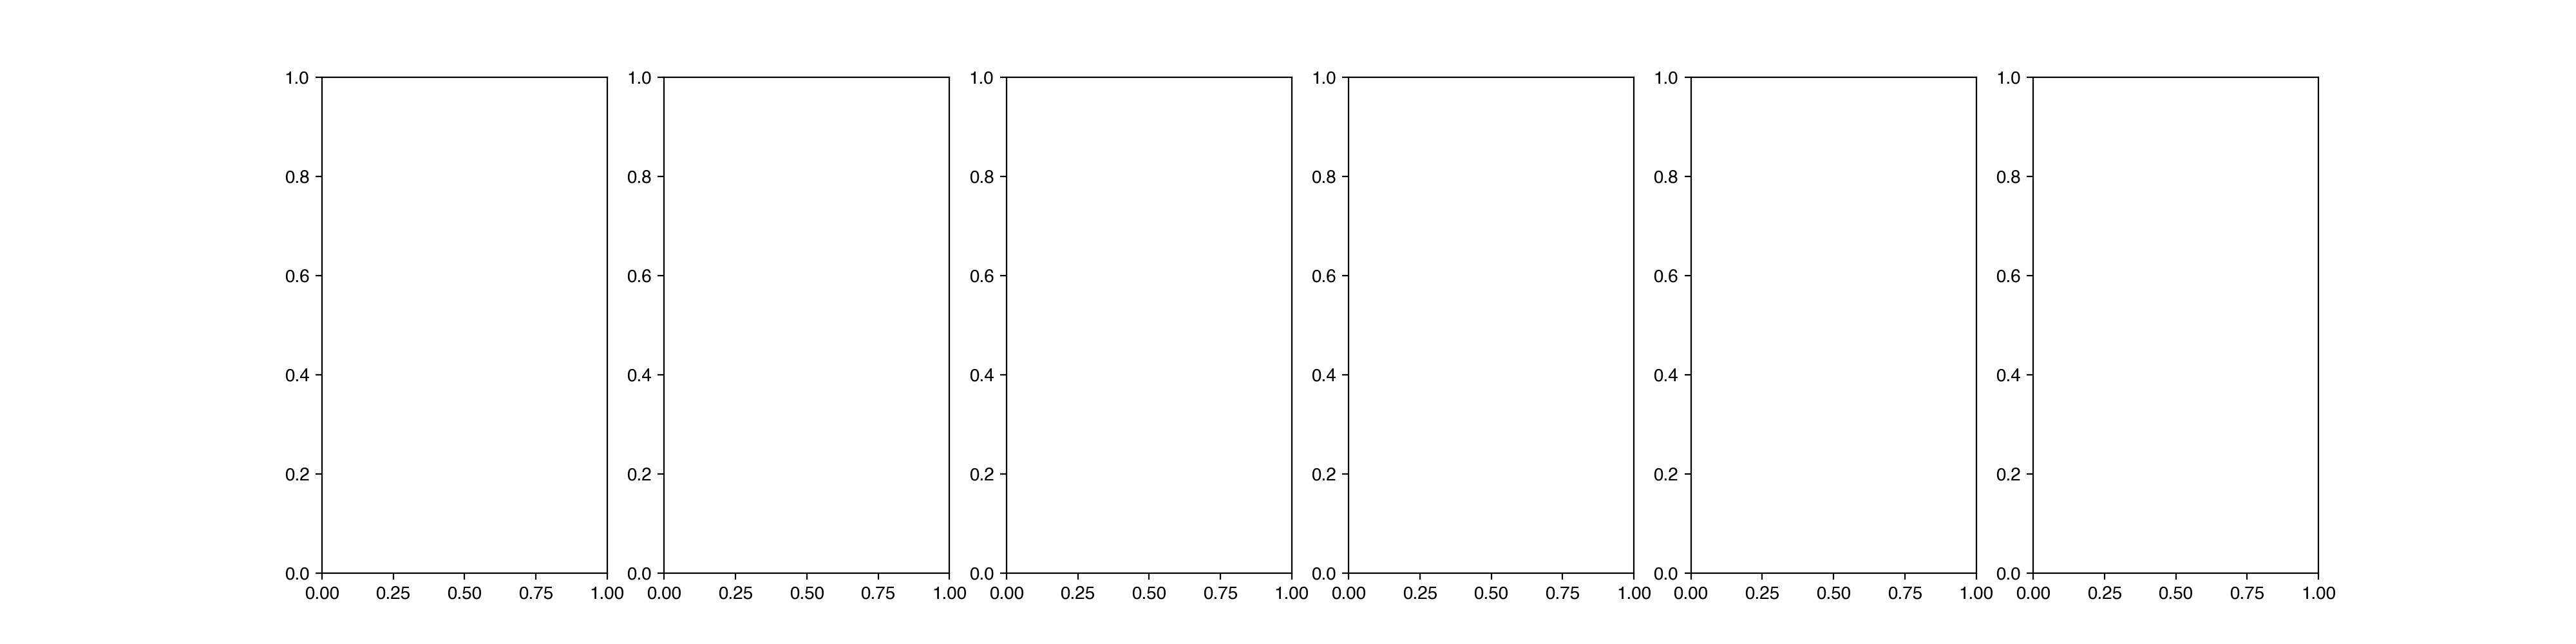

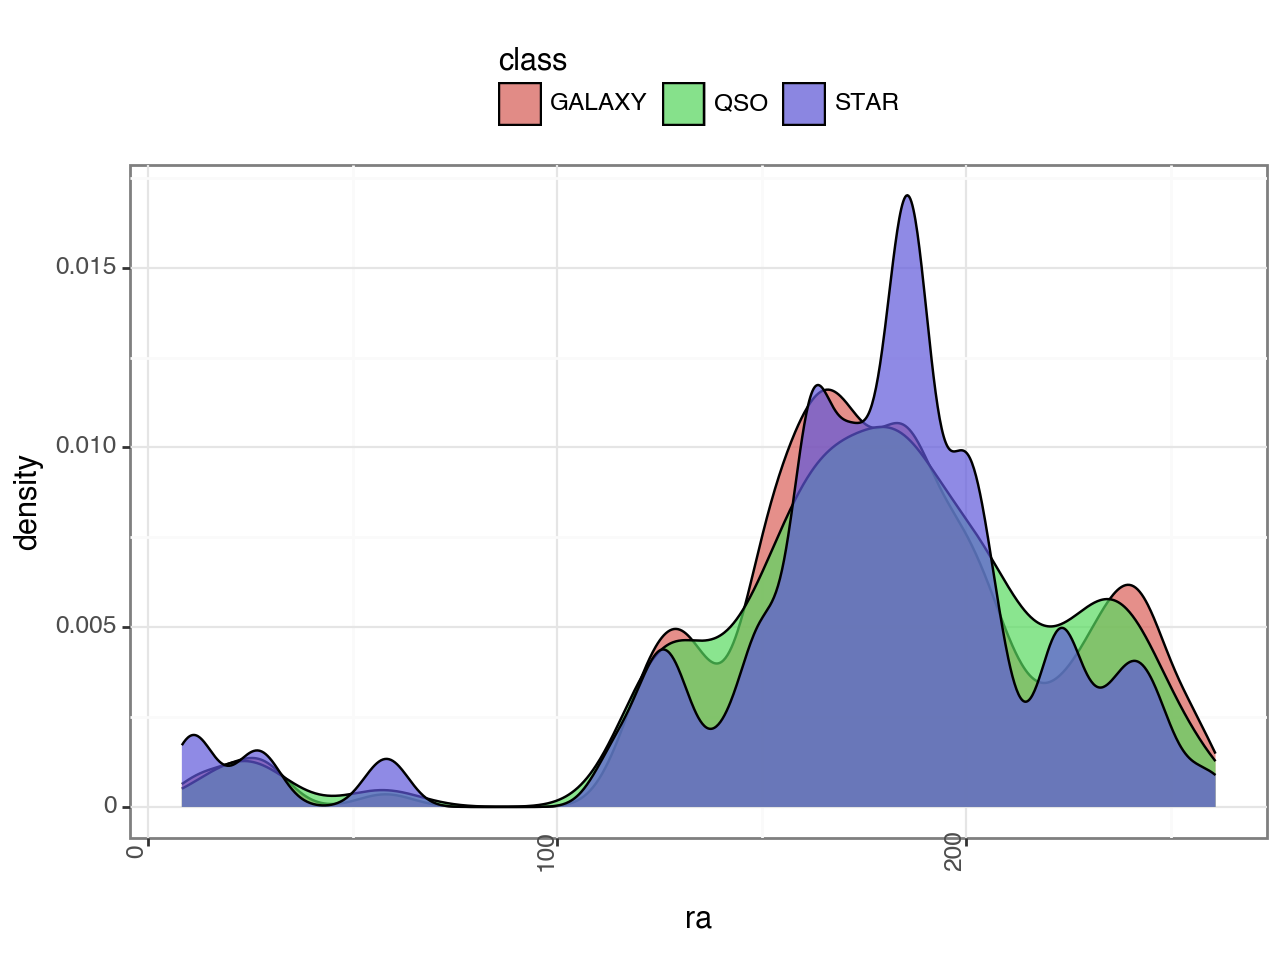

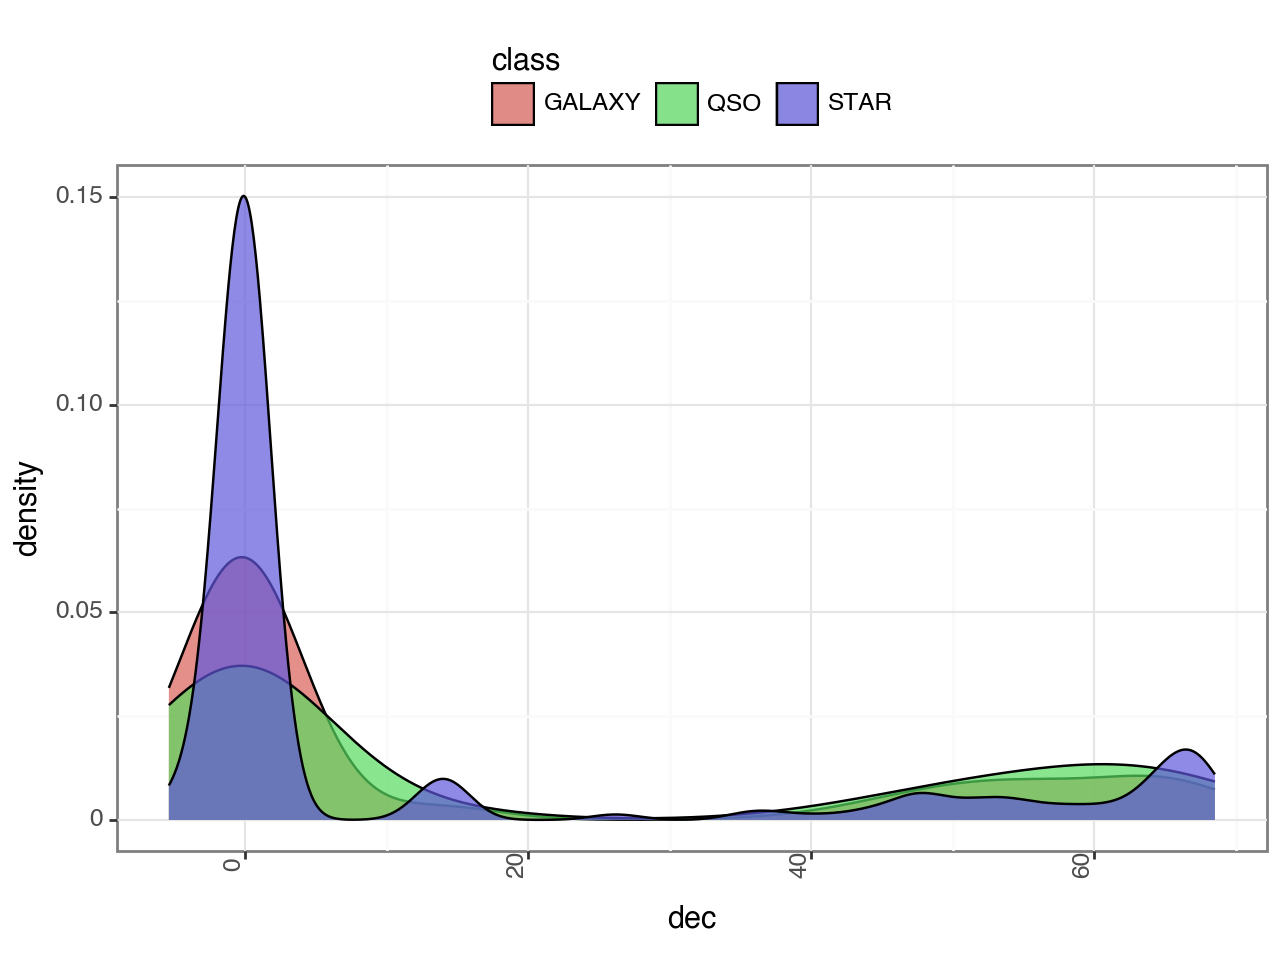

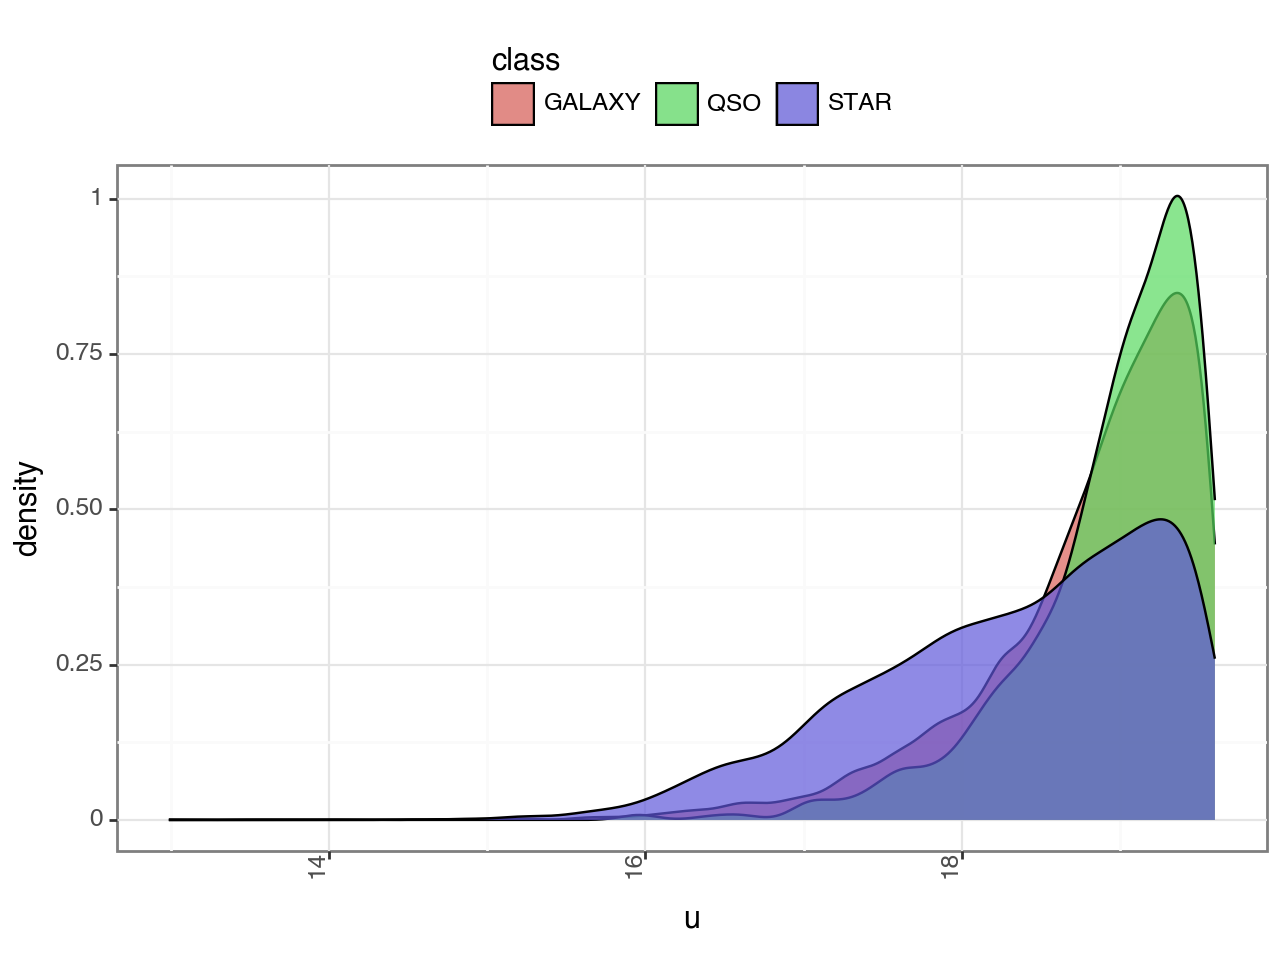

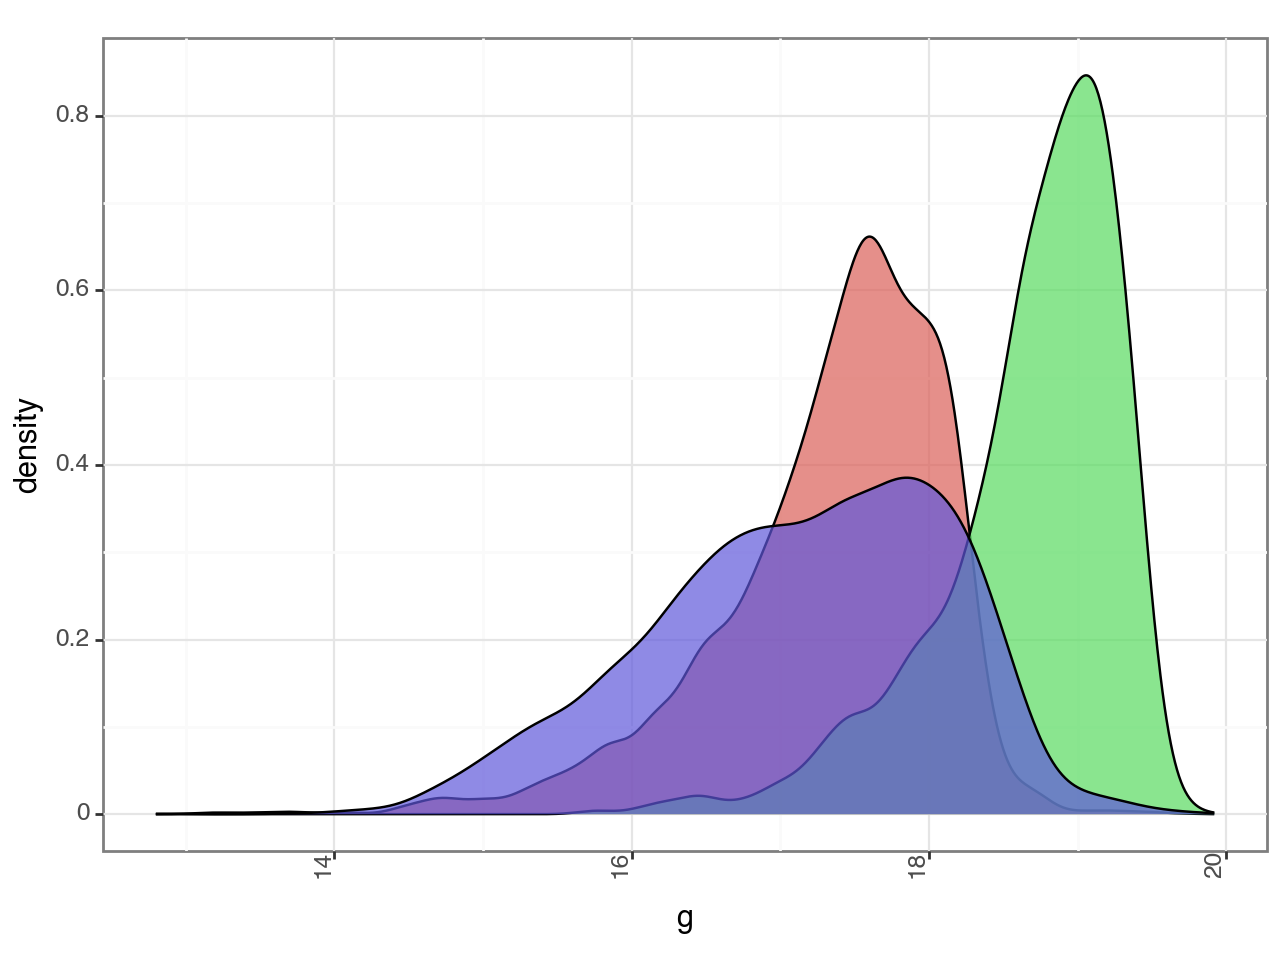

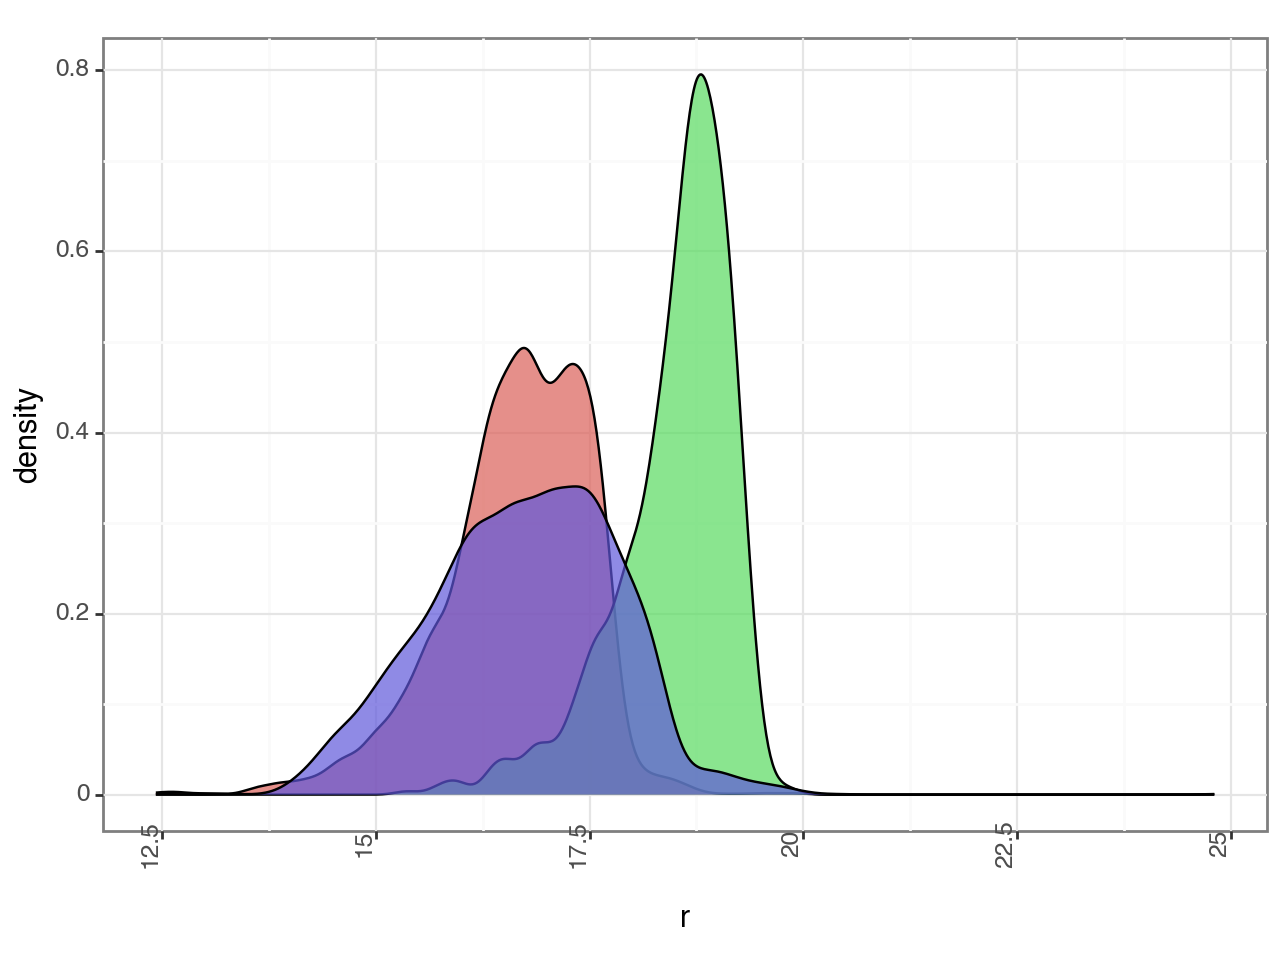

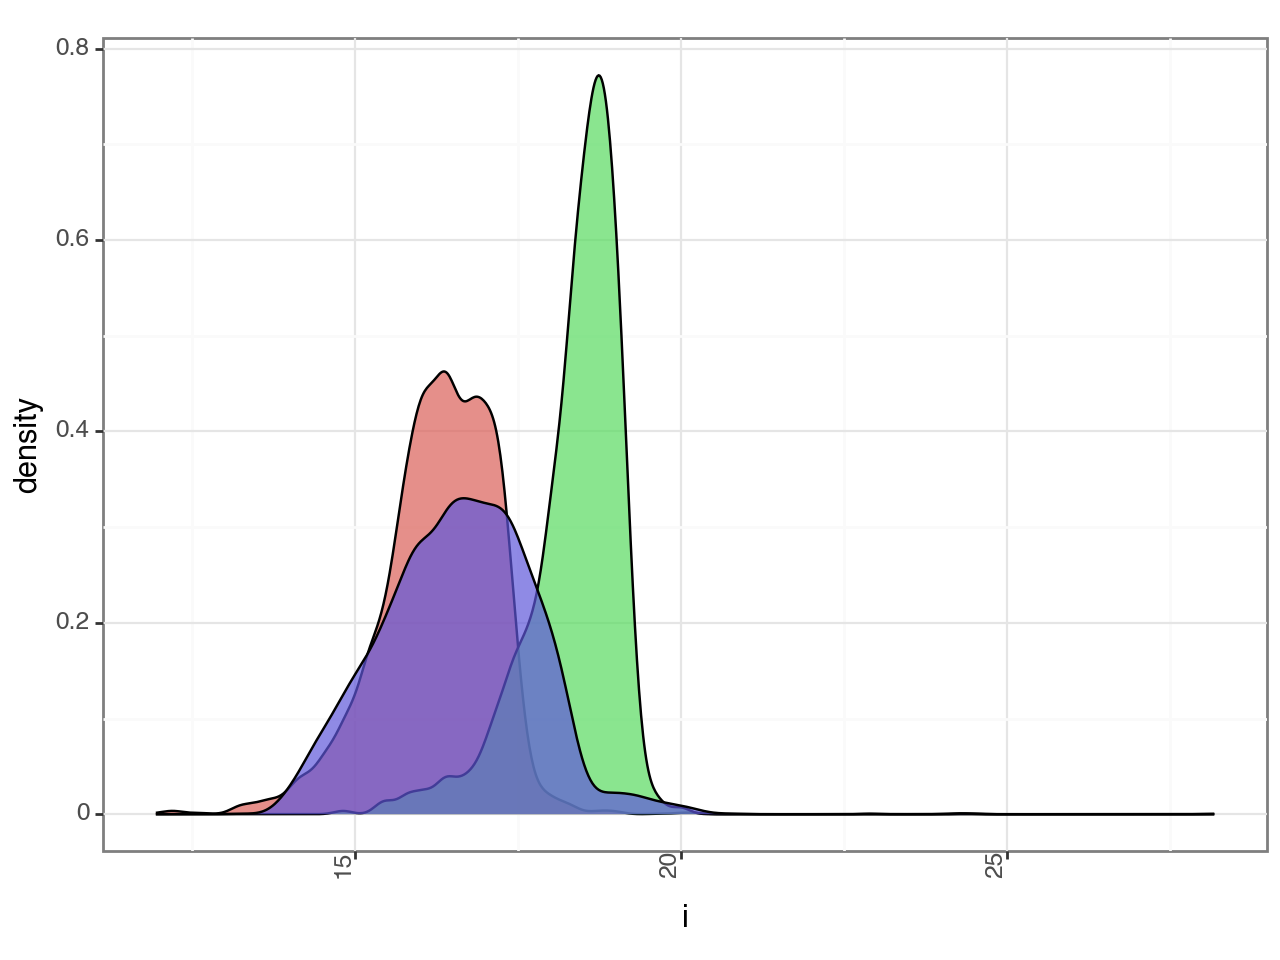

<Figure size 640x480 with 0 Axes>

In [6]:
#density distribution charts

theme1 = theme_bw() + theme(axis_text_x=element_text(angle=90, hjust=1, vjust=0.5), 
                            legend_position="top")
theme2 = theme_bw() + theme(axis_text_x=element_text(angle=90, hjust=1, vjust=0.5), 
                            legend_position="none")

#  individual plots for first half of data
p1 = ggplot(sky, aes('ra', fill='class')) + geom_density(alpha=0.7) + theme1
p2 = ggplot(sky, aes('dec', fill='class')) + geom_density(alpha=0.7) + theme1
p3 = ggplot(sky, aes('u', fill='class')) + geom_density(alpha=0.7) + theme1
p4 = ggplot(sky, aes('g', fill='class')) + geom_density(alpha=0.7) + theme2
p5 = ggplot(sky, aes('r', fill='class')) + geom_density(alpha=0.7) + theme2
p6 = ggplot(sky, aes('i', fill='class')) + geom_density(alpha=0.7) + theme2

# arrange the plots
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

for i, plot in enumerate([p1, p2, p3, p4, p5, p6]):
    plot.draw(axes[i])

plt.tight_layout()
plt.show()

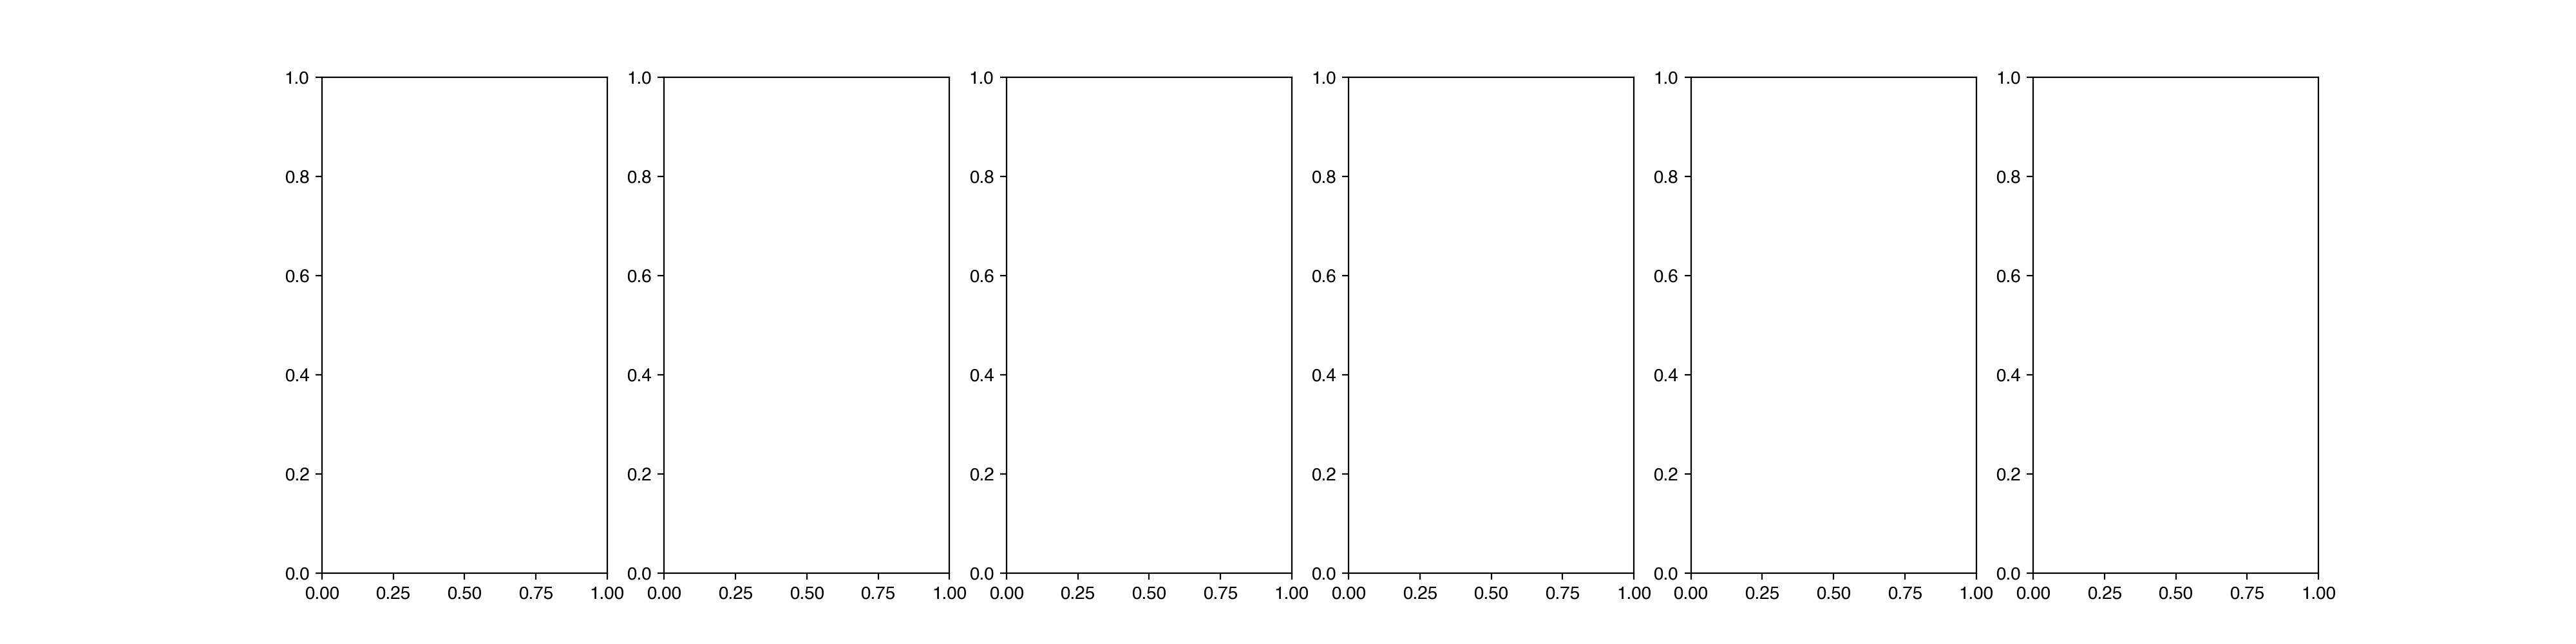

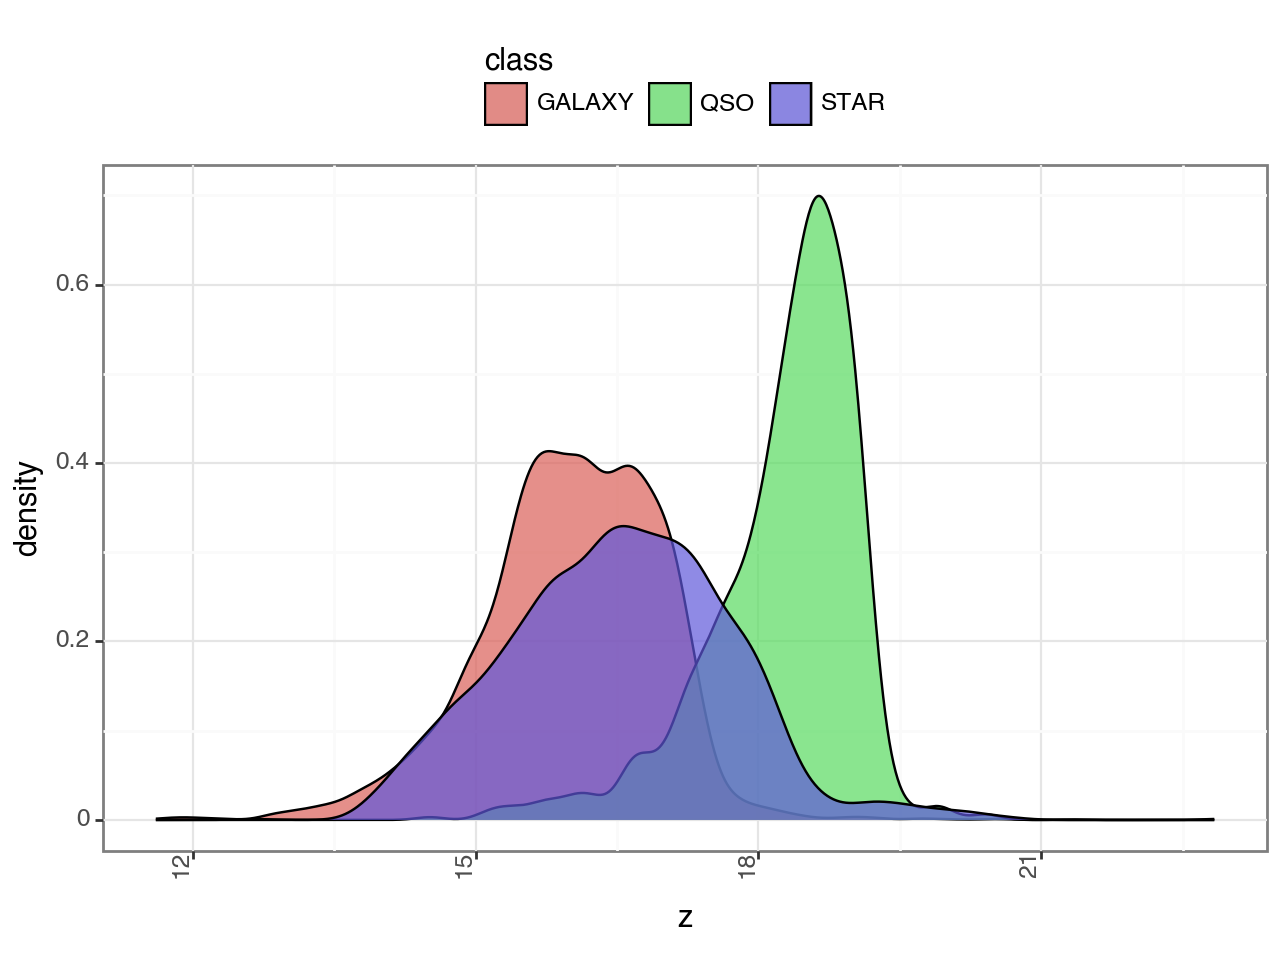

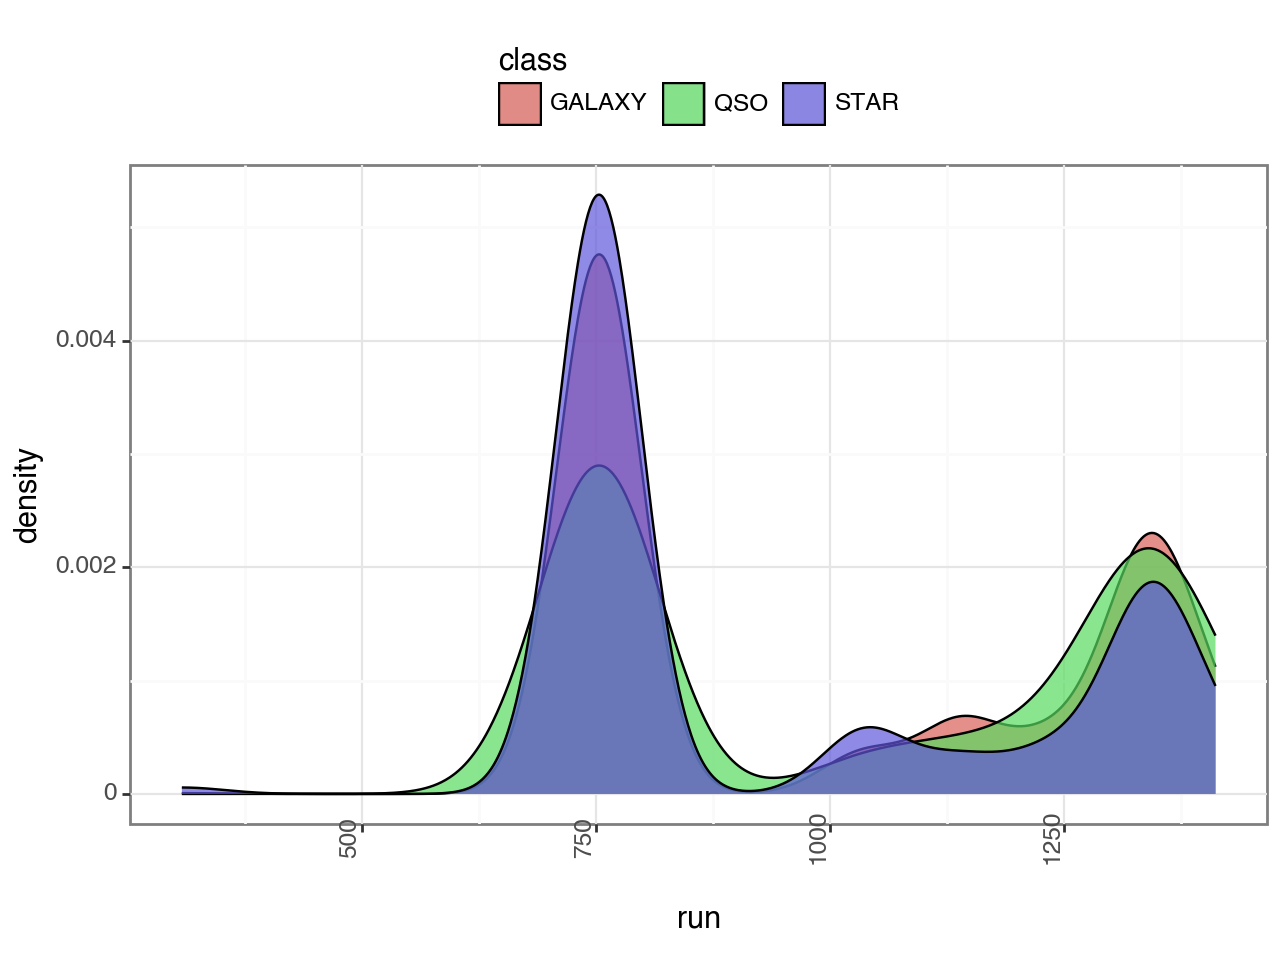

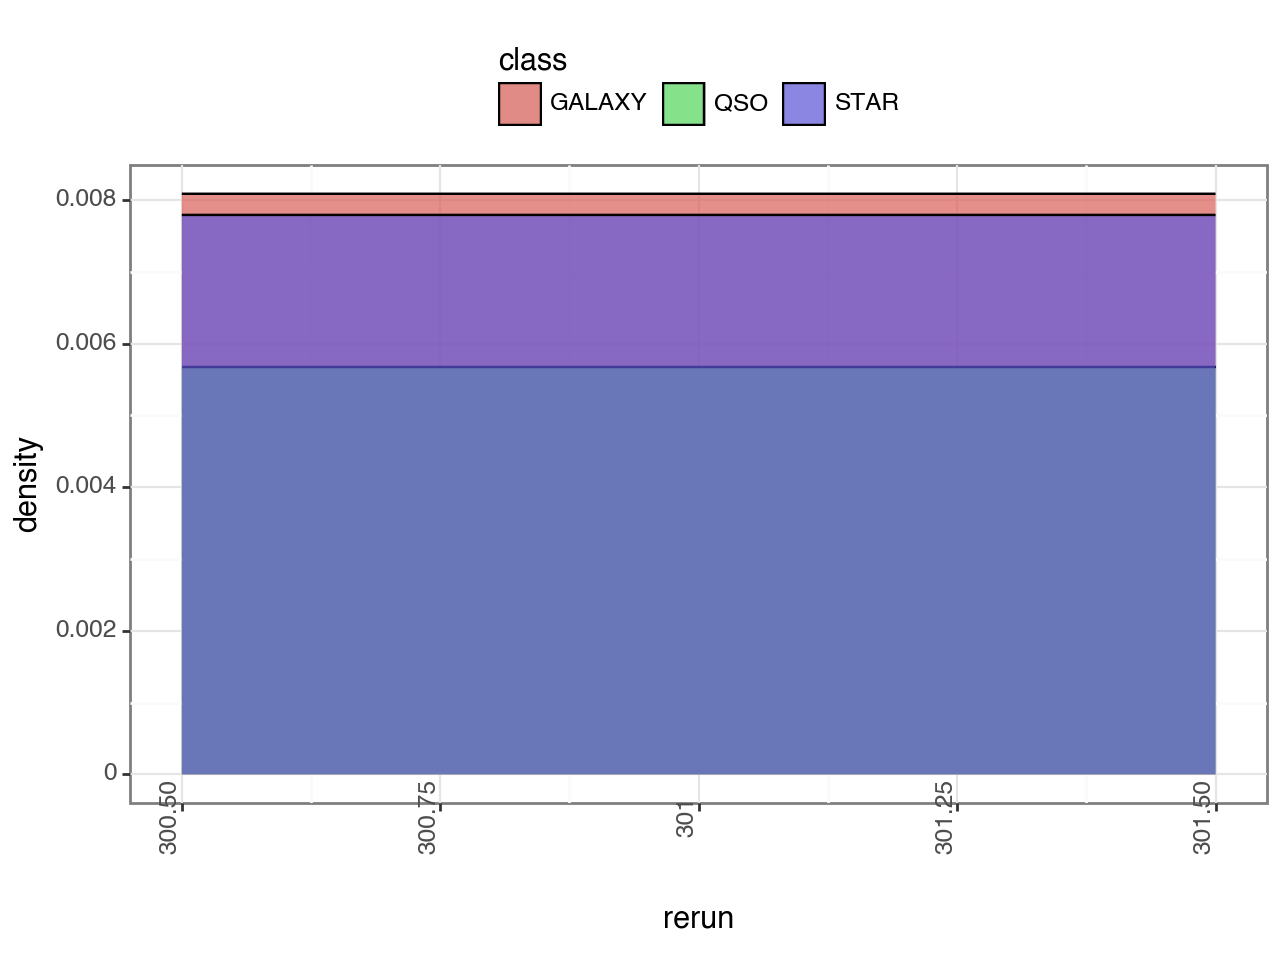

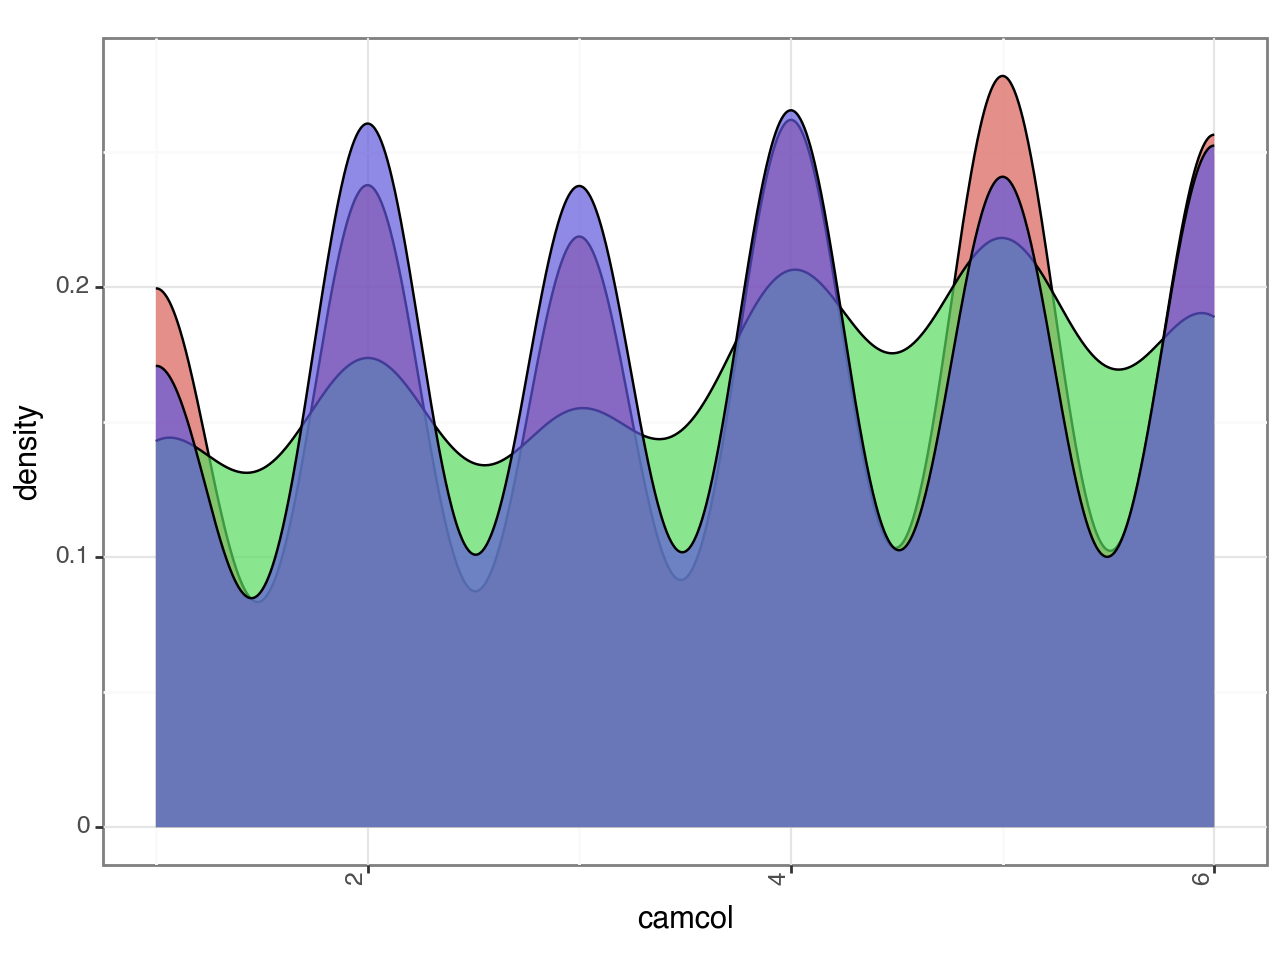

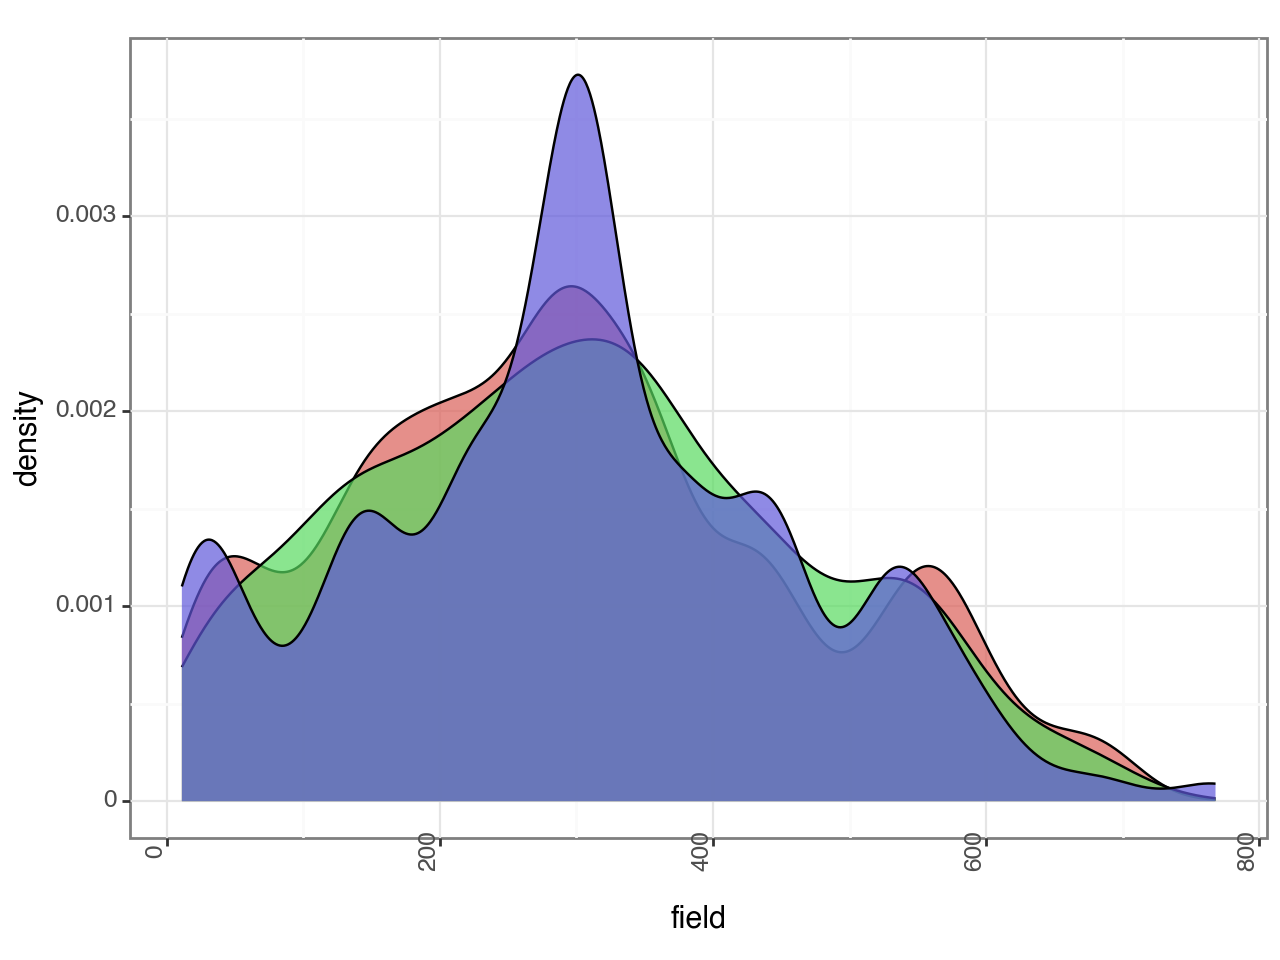

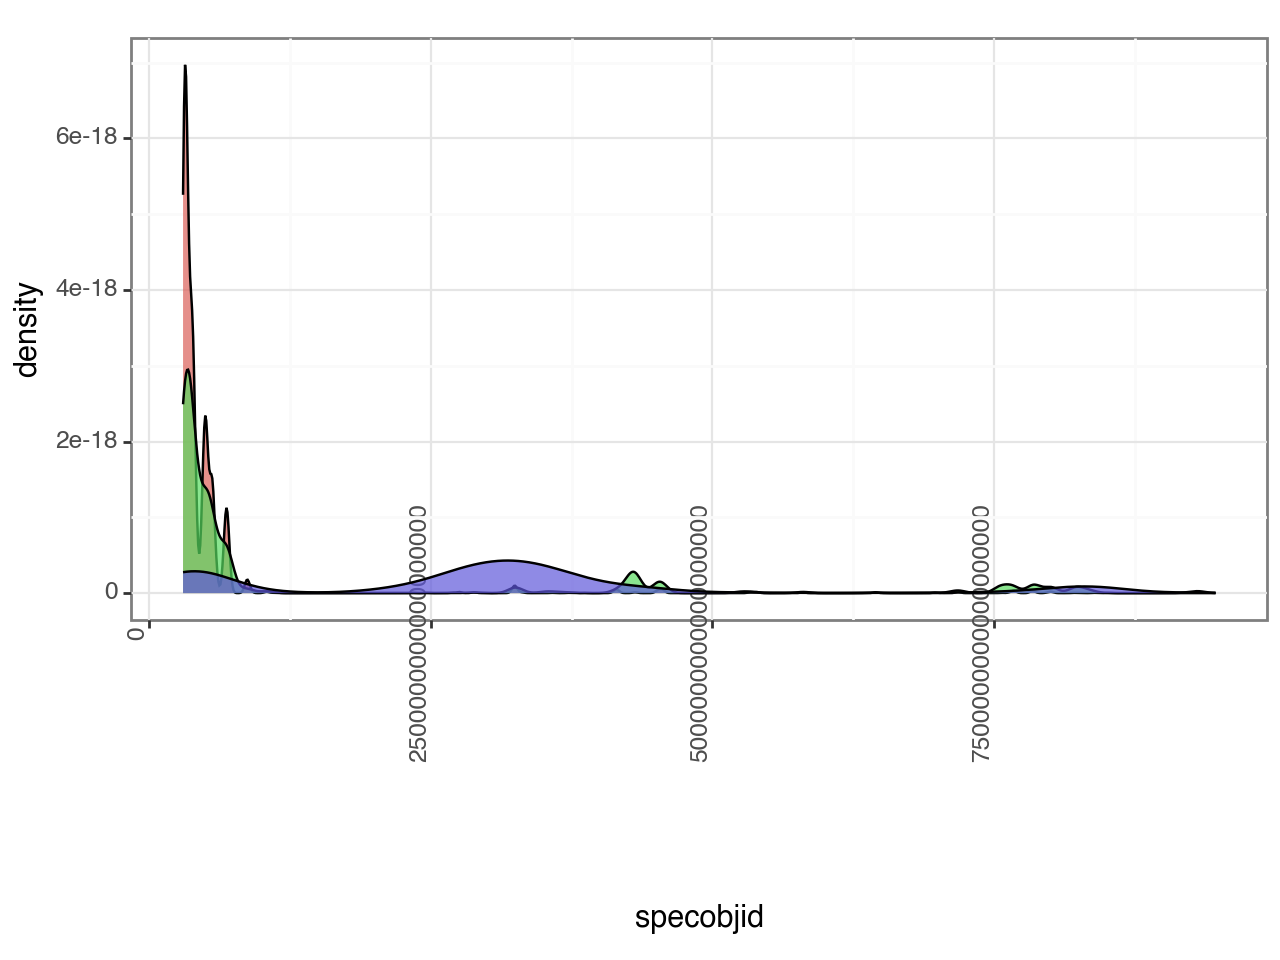

<Figure size 640x480 with 0 Axes>

In [7]:
#  individual plots for second half of data
p1 = ggplot(sky, aes('z', fill='class')) + geom_density(alpha=0.7) + theme1
p2 = ggplot(sky, aes('run', fill='class')) + geom_density(alpha=0.7) + theme1
p3 = ggplot(sky, aes('rerun', fill='class')) + geom_density(alpha=0.7) + theme1
p4 = ggplot(sky, aes('camcol', fill='class')) + geom_density(alpha=0.7) + theme2
p5 = ggplot(sky, aes('field', fill='class')) + geom_density(alpha=0.7) + theme2
p6 = ggplot(sky, aes('specobjid', fill='class')) + geom_density(alpha=0.7) + theme2

#  arrange the plots
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

for i, plot in enumerate([p1, p2, p3, p4, p5, p6]):
    plot.draw(axes[i])

plt.tight_layout()
plt.show()

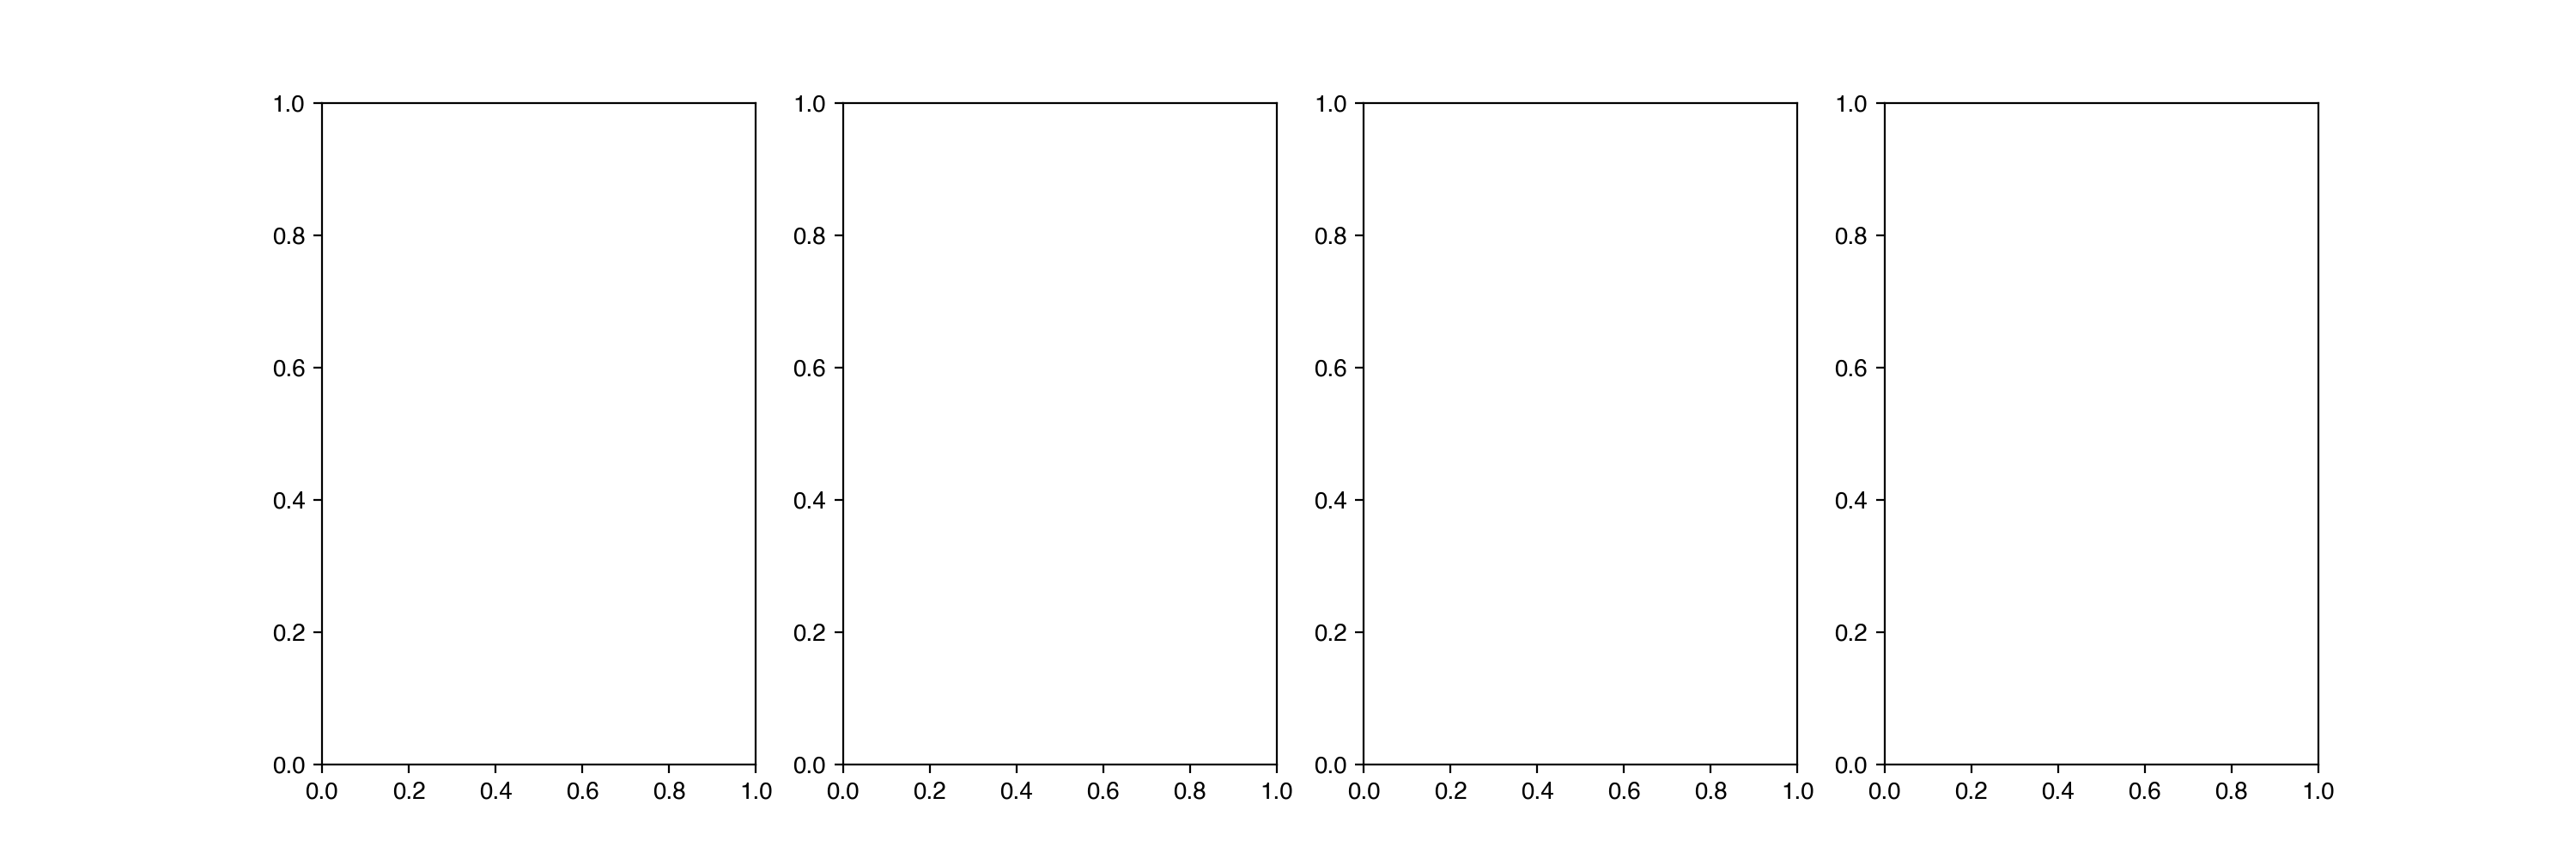

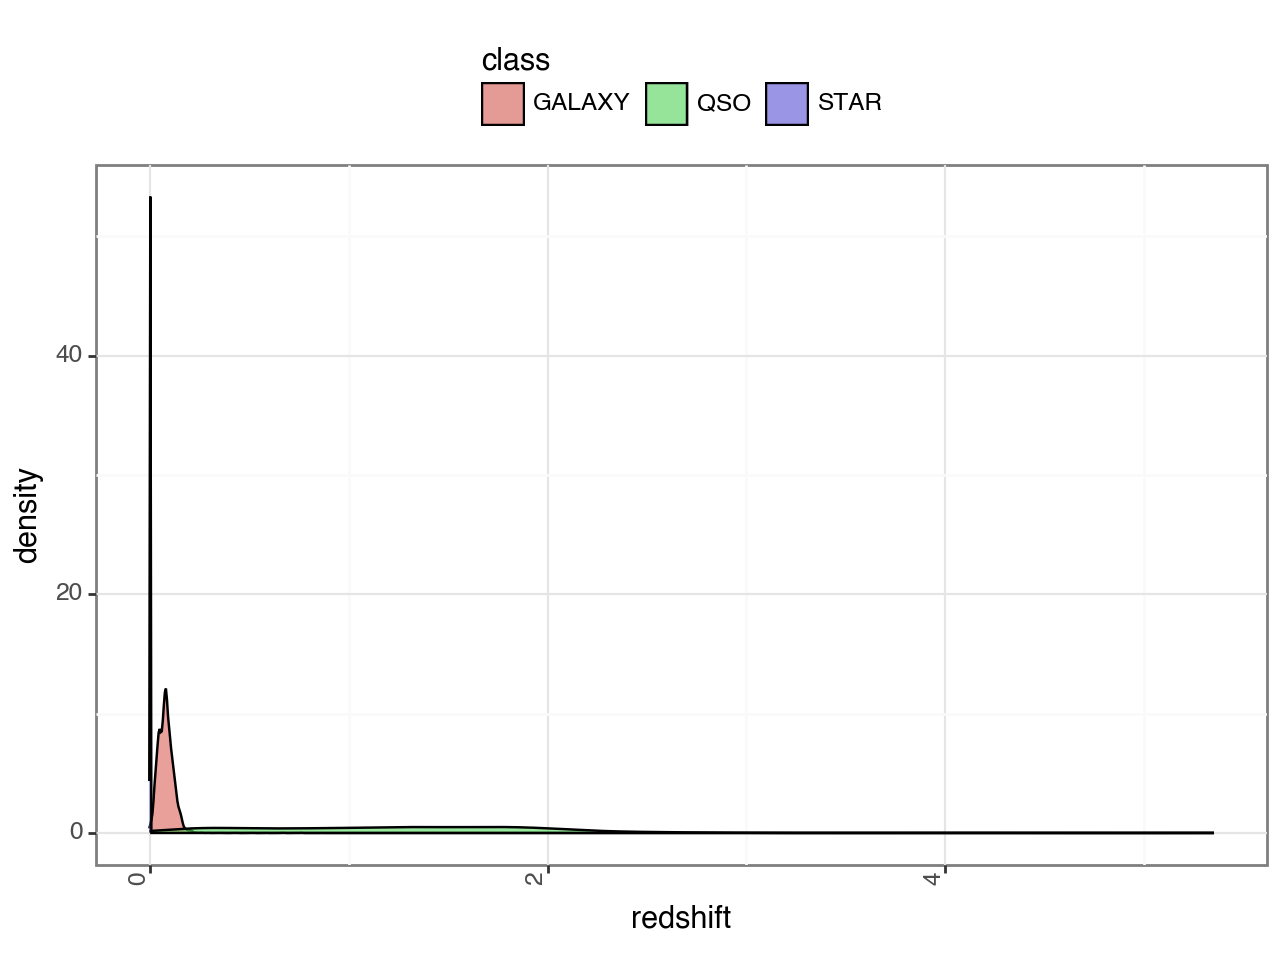

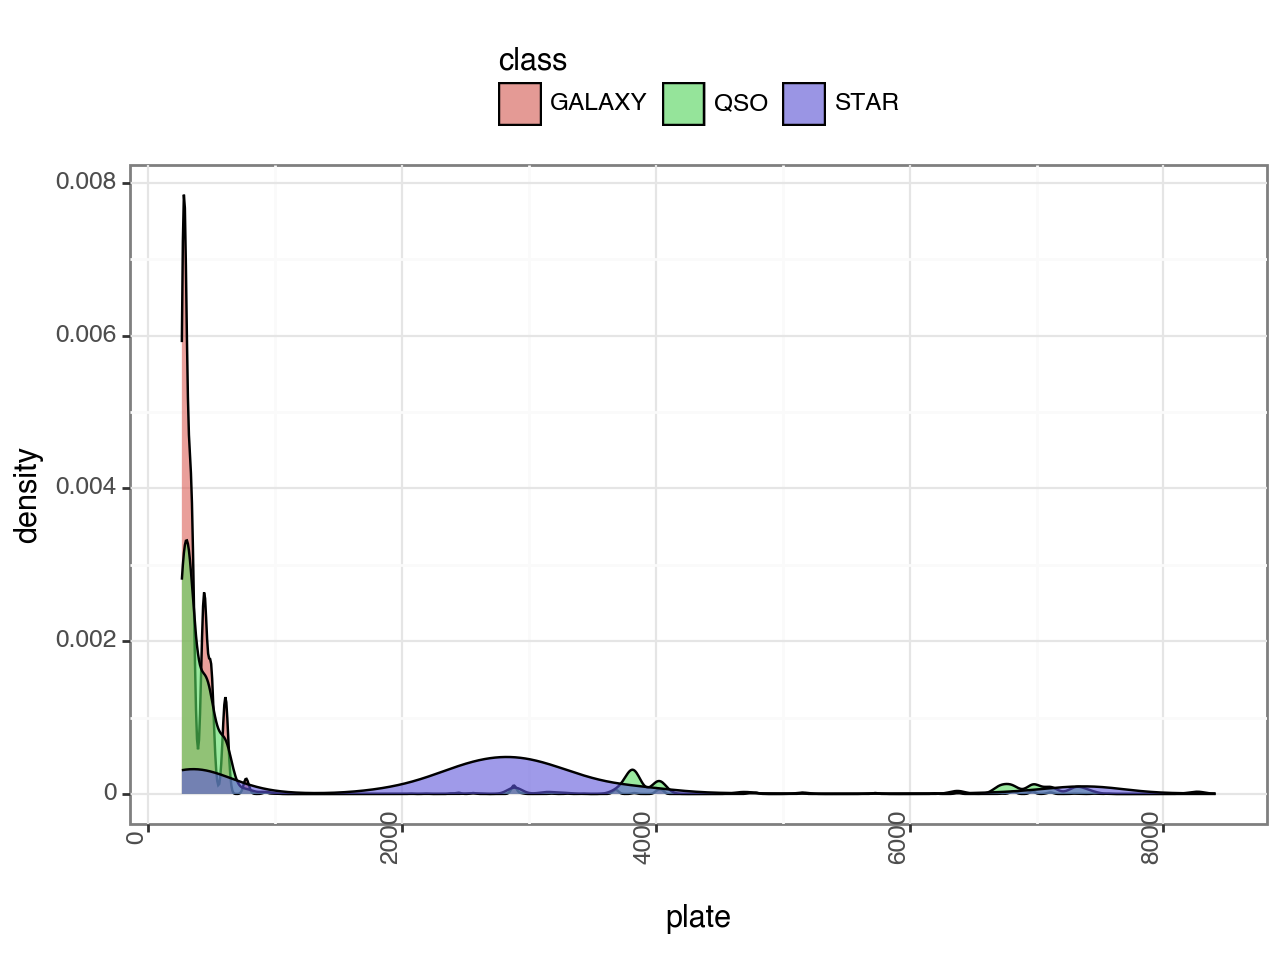

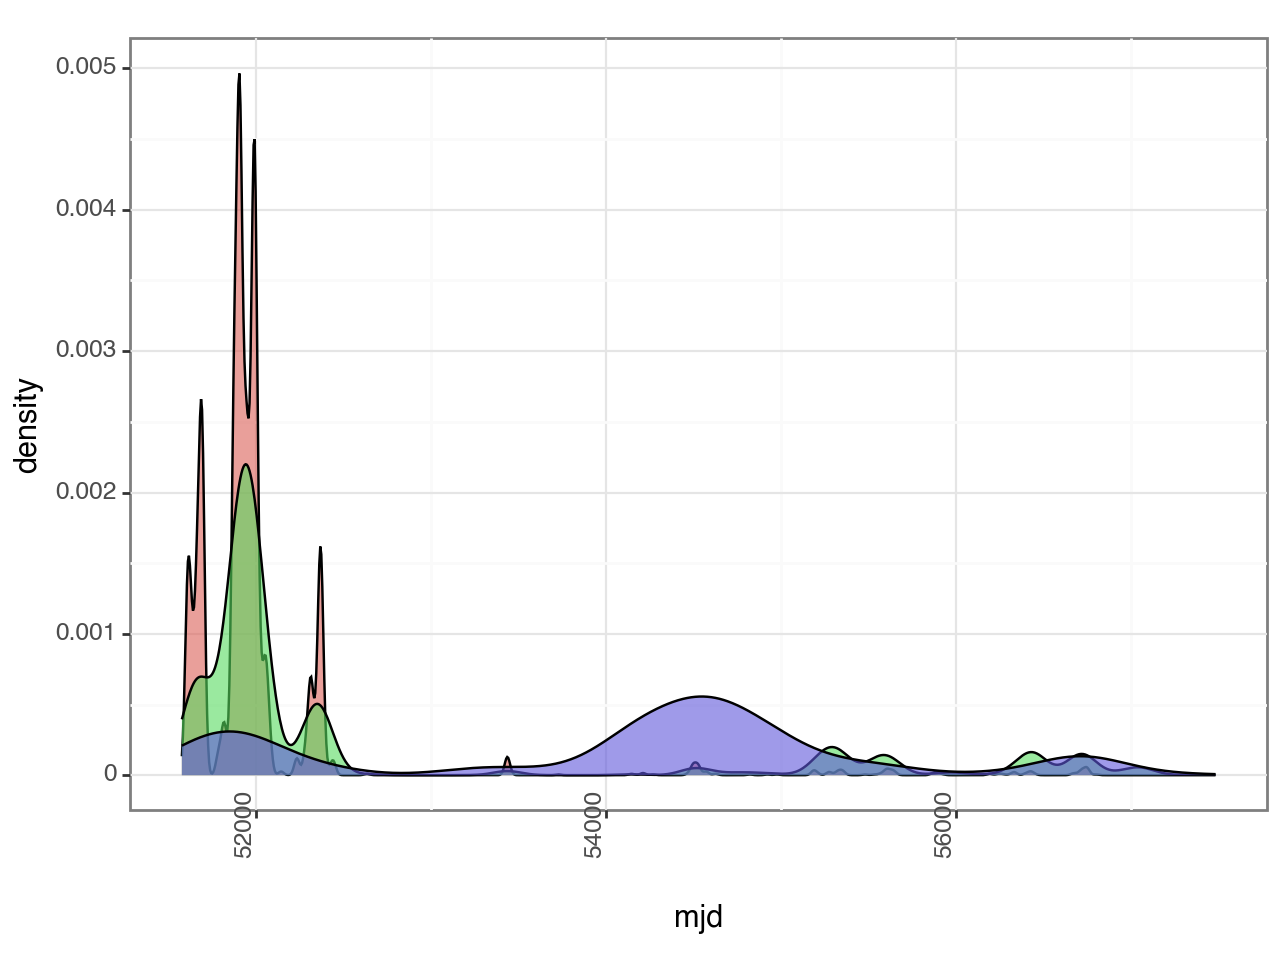

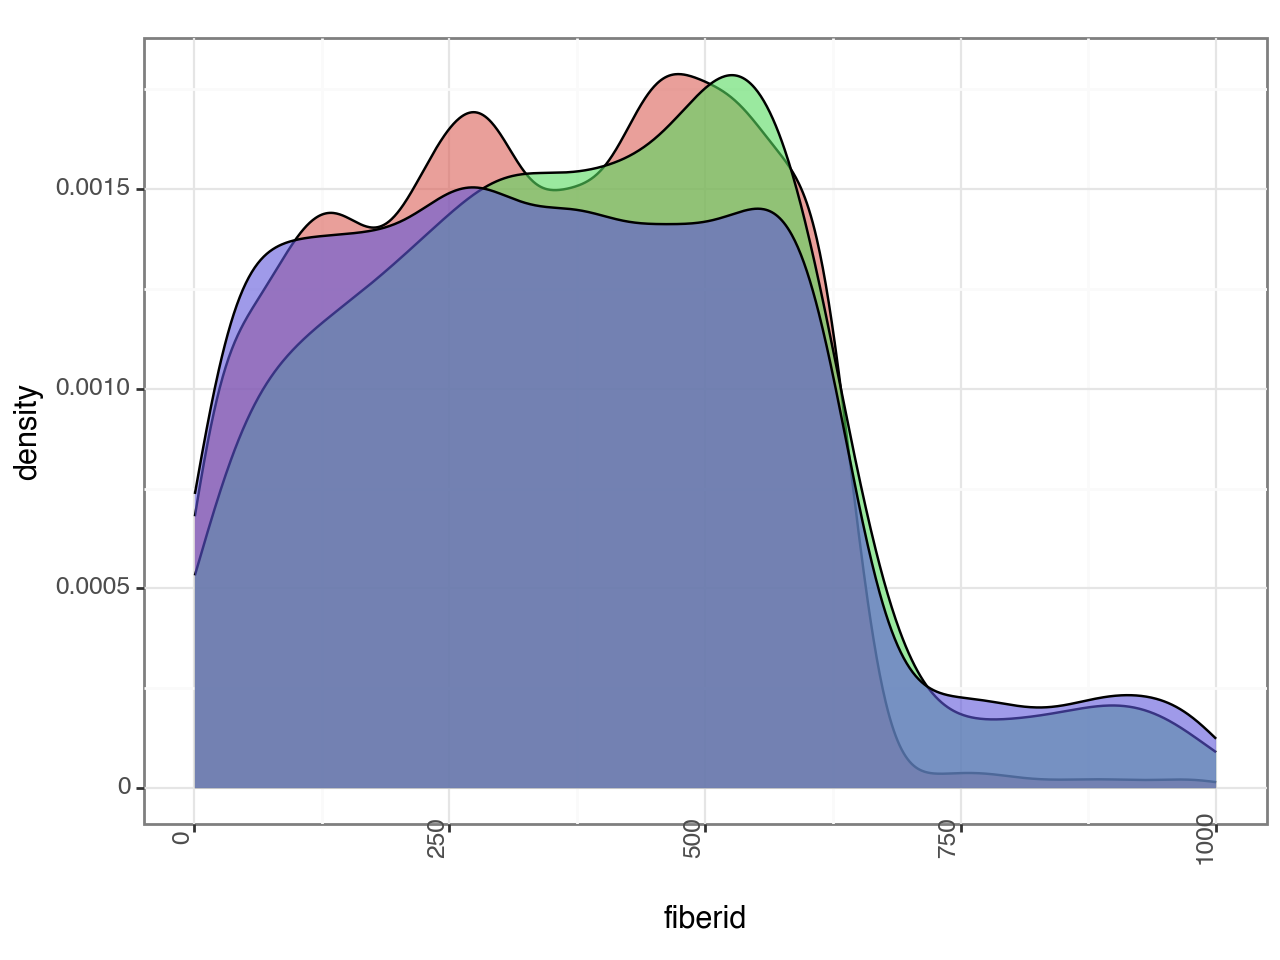

<Figure size 640x480 with 0 Axes>

In [9]:
# individual plots for last few pieces of data
p1 = ggplot(sky, aes('redshift', fill='class')) + geom_density(alpha=0.6) + theme1
p2 = ggplot(sky, aes('plate', fill='class')) + geom_density(alpha=0.6) + theme1
p3 = ggplot(sky, aes('mjd', fill='class')) + geom_density(alpha=0.6) + theme2
p4 = ggplot(sky, aes('fiberid', fill='class')) + geom_density(alpha=0.6) + theme2

# arrange the plots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, plot in enumerate([p1, p2, p3, p4]):
    plot.draw(axes[i])

plt.tight_layout()
plt.show()

## Astronomy Overview

ra: "Right Ascension" is the celestial equivalent of terrestrial longitude, measuring the angle eastward along the celestial equator from the vernal equinox to the hour circle of the point in question.

dec: "Declination" is the celestial equivalent of terrestrial latitude, indicating how far north or south an object is from the celestial equator, measured in degrees.

redshift: Redshift indicates how much the wavelength of light from an astronomical object has been stretched due to the expansion of the universe; a higher redshift suggests the object is moving away from us at a faster rate. In some contexts, redshift can also be related to distance, with higher redshift objects being further away.

In [10]:
# continued visualizations to understand the layout of our data

#scatter plot of all data

fig = px.scatter_3d(sky, x='ra', y='dec', z='redshift', color='class', title='3D Scatter plot of Sky Data')

#  layout
fig.update_layout(scene=dict(xaxis_title='Right Ascension',
                             yaxis_title='Declination',
                             zaxis_title='Redshift'))

# Save to HTML
pio.write_html(fig, file='p4.html')

# Display 
display(HTML('<iframe src="p4.html" width=100% height=450></iframe>'))

/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



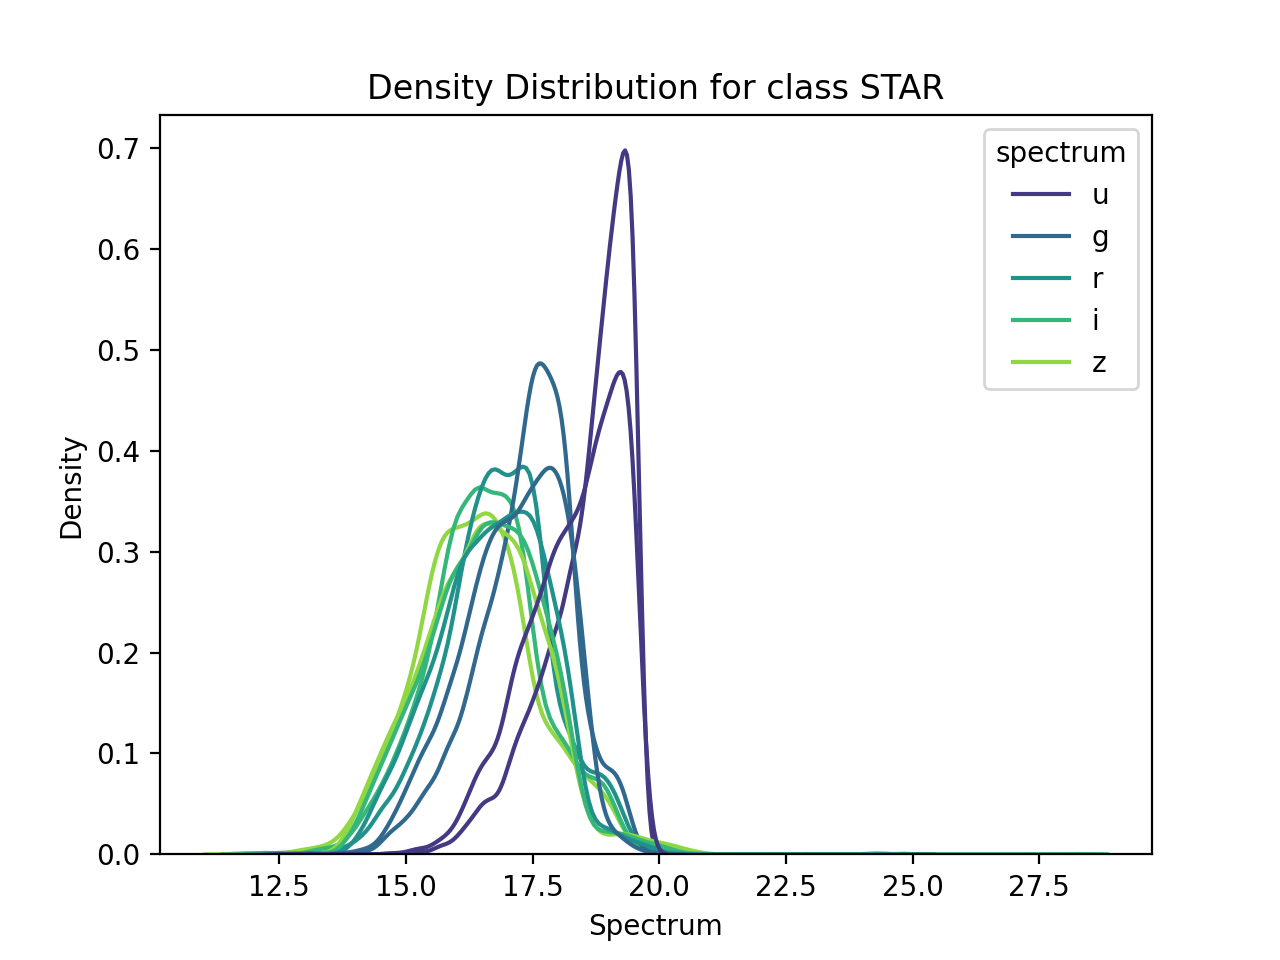

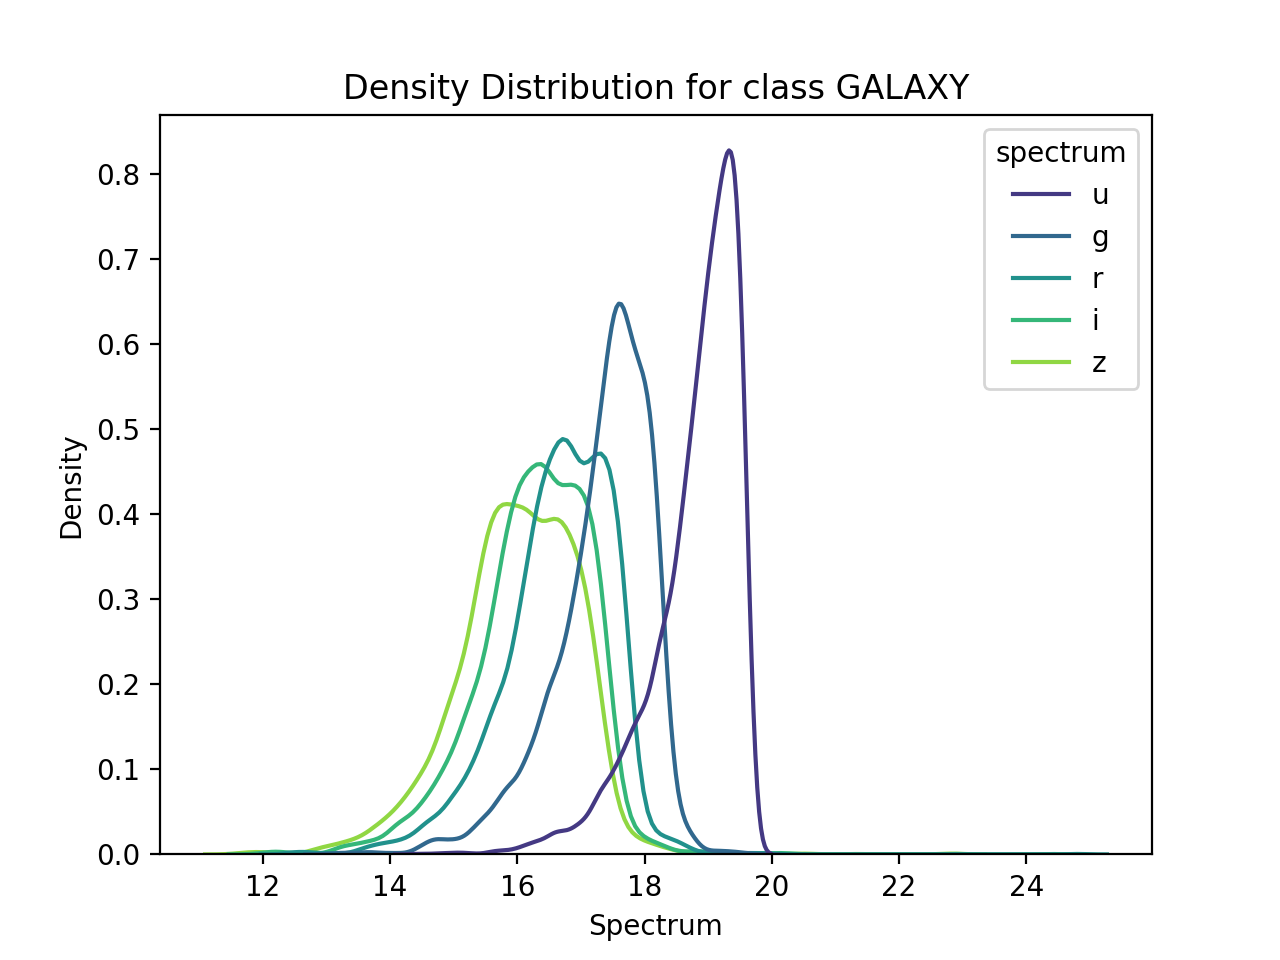

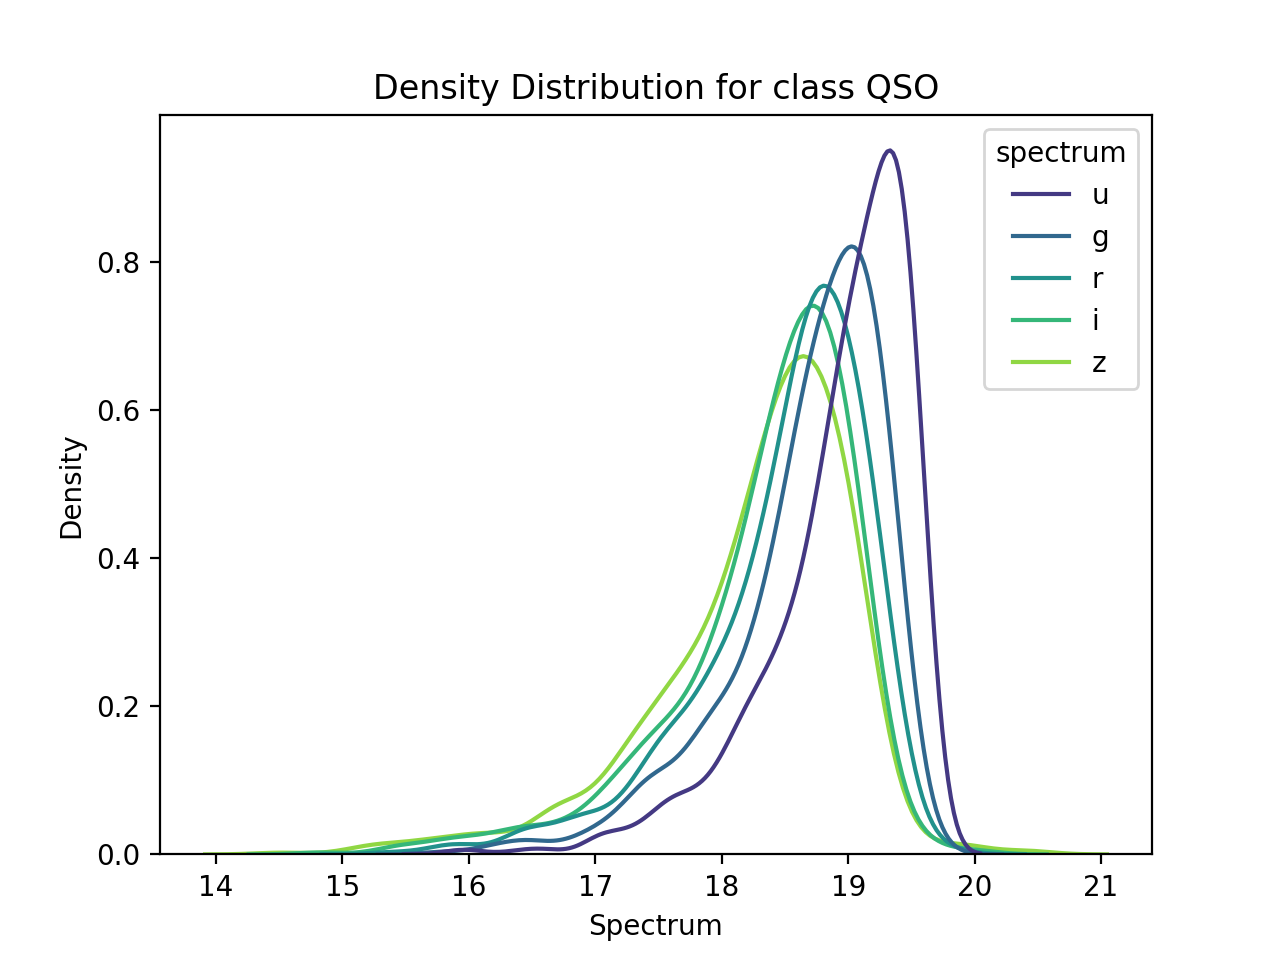

In [11]:
#density distribution of summed values for each class

ugriz = pd.melt(sky, id_vars=['ra', 'dec', 'class'], value_vars=['u', 'g', 'r', 'i', 'z'], 
                var_name='spectrum', value_name='Total')
ugriz['spec'] = ugriz.groupby(['ra', 'dec', 'spectrum', 'class'])['Total'].transform('sum')

plt.figure()
sns.kdeplot(data=ugriz, x='spec', hue='spectrum', common_norm=False, palette='viridis') 


classes = ugriz['class'].unique()
for c in classes:
    subset = ugriz[ugriz['class'] == c]
    sns.kdeplot(data=subset, x='spec', hue='spectrum', common_norm=False, palette='viridis')
    plt.title(f'Density Distribution for class {c}')
    plt.xlabel('Spectrum') 
    plt.show()

## Model Building to Classify by Class

Below we create an SVM algorithm to classify the three classes.  We chose to do this with an SVM because SVM's are effective in high-dimensional spaces and have the capability to classify non-linearly separable data using the kernel trick. They tend to provide robust classification results, especially when the classes are well-separated.  We saw in our data visualizations that the classes are reasonably well seperated, making an SVM a good choice for this dataset.


### Defining Terms

SVM: SVMs are fundamentally linear models, similar to linear regression and logistic regression, they utilize hyperplanes and techniques like the Maximal Margin Classifier and Soft Margin Classifier for boundary separation. For datasets that aren't linearly separable, the kernel trick transforms the data into a feature space where it becomes linearly separable.

Hyperplane: In SVM, a hyperplane is a flat affine subspace used to separate different classes in a dataset, with the goal of maximizing the distance between the closest data points of the classes.

Maximal Margin Classifier: This refers to the ideal hyperplane that best separates the data by maximizing the margin (or distance) between the hyperplane and the nearest data points from each class.

Soft Margin Classifier: Recognizing that real-world data might not be perfectly separable, the soft margin classifier allows some misclassifications in order to achieve a broader and potentially more generalizable boundary between classes.

### Data Preparation

In order to prepare our data for modelling we need to first remove non-numeric values, convert the target classes to a factor, and split the data into training and test sets.

In [12]:
# Data Preparation

# Drop specific columns (non numeric variables)
sky = sky.drop(sky.columns[[0, 9, 12, 17]], axis=1, errors= 'ignore')

# Convert 'class' to a factor/ category
sky['class'] = sky['class'].astype('category')

# Split data into train & test
train, test = train_test_split(sky, test_size=0.3, random_state=100, stratify=sky['class'])

# Display the first few rows of the test dataset
print(test.head())


              ra        dec         u         g         r         i         z  \
5974  126.131823  47.336355  19.41911  18.97051  18.89738  18.65042  18.70335   
7341  240.561353  52.356042  17.71877  16.82975  16.53588  16.42243  16.40706   
3526  243.854697   0.823367  18.71818  17.39557  16.87677  16.71544  16.62775   
8680  187.751805  -0.312087  17.38079  16.36322  16.17968  16.14471  16.15410   
5334  120.524594  43.541191  18.12680  16.81592  16.60292  16.53331  16.48909   

       run  camcol  field class  redshift  plate    mjd  
5974  1331       3    150   QSO  0.630255    441  51868  
7341  1345       6    564  STAR -0.000658   2176  54243  
3526   745       5    569  STAR -0.000067    346  51693  
8680   752       3    295  STAR  0.000161   2895  54567  
5334  1331       5    114  STAR -0.000136   3683  55178  


## Build a Linear Kernel

This kernel computes the inner product of two input vectors, resulting in a decision boundary that is linear in nature. It's used when the data is linearly separable or nearly so.  We test it first to see an initial fit, our data is relatively linear so we can reasonably expect it to be a good fit.

In [13]:
# Define features & target variable
X_train = train.drop('class', axis=1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']

# 1. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train the model using LinearSVC
Model_linear = LinearSVC(C=0.1, max_iter=50000)
Model_linear.fit(X_train_scaled, y_train)

# Alternative: If LinearSVC doesn't converge, use SVC with linear kernel
# Model_linear = SVC(kernel="linear", C=1, max_iter=50000)
# Model_linear.fit(X_train_scaled, y_train)

# 3. Make predictions
Eval_linear = Model_linear.predict(X_test_scaled)

# 4. Produce a confusion matrix
cm = confusion_matrix(y_test, Eval_linear)
print(cm)


[[1450    9   40]
 [  31  223    1]
 [  39    1 1206]]


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



In [14]:
# Overall Accuracy
accuracy = accuracy_score(y_test, Eval_linear)
print(f"Overall Accuracy: {accuracy:.2f}")

# Classification Report
report = classification_report(y_test, Eval_linear)
print(report)

Overall Accuracy: 0.96
              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96      1499
         QSO       0.96      0.87      0.91       255
        STAR       0.97      0.97      0.97      1246

    accuracy                           0.96      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



## Build a Polynomial Kernel

This kernel computes a polynomial function of the inner product of two input vectors, introducing non-linearity and allowing for curved decision boundaries. The degree of the polynomial determines the complexity of the boundaries. 

Our data fit well linearly so this likely won't be as strong of a fit, but it is useful to check to ensure we are utilizing the most optimal kernel.

In [15]:
#polynomial kernel

X_test = test.drop(test.columns[10], axis=1)

# Polynomial Kernel
Model_poly = SVC(kernel='poly', C=1, max_iter=50000)
Model_poly.fit(X_train, y_train)
Eval_poly = Model_poly.predict(X_test)

# Confusion matrix 
print(confusion_matrix(y_test, Eval_poly))

# Accuracy
acc = accuracy_score(y_test, Eval_poly)

# 95% CI for accuracy
n = len(y_test)
z = 1.96  # for 95% CI
interval = z * ((acc * (1 - acc)) / n) ** 0.5
conf_interval = (acc - interval, acc + interval)

print(f"Accuracy: {acc}")


print(f"95% CI: {conf_interval}")

#  statistics by class
print(classification_report(y_test, Eval_poly))


[[1458    0   41]
 [ 205    0   50]
 [ 307    0  939]]
Accuracy: 0.799
95% CI: (0.7846594151862625, 0.8133405848137376)
              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Build a RBF Kernel 

The Radial Basis Function kernel is often referred to as the Gaussian kernel. The RBF kernel creates decision boundaries based on the distance between data points in the feature space, allowing for complex, region-based separations even when no clear linear or polynomial division is apparent.

Our data fit well linearly so this likely won't be as strong of a fit, but it is useful to check to ensure we are utilizing the most optimal kernel.

In [16]:
#radial base function

# Define your features and target variable
X_train = train.drop('class', axis=1)
y_train = train['class']

# Dropping the 11th column for the test set
X_test = test.drop(test.columns[10], axis=1)
y_test = test['class']

# Using RBF Kernel
Model_RBF = SVC(kernel='rbf', C=1000, max_iter=50000)
Model_RBF.fit(X_train, y_train)
Eval_RBF = Model_RBF.predict(X_test)

# Confusion matrix - RBF Kernel
print(confusion_matrix(y_test, Eval_RBF))

# Accuracy
acc = accuracy_score(y_test, Eval_RBF)

# 95% CI for accuracy
n = len(y_test)
z = 1.96  # for 95% CI
interval = z * ((acc * (1 - acc)) / n) ** 0.5
conf_interval = (acc - interval, acc + interval)

print(f"Accuracy: {acc}")


print(f"95% CI: {conf_interval}")

#  statistics by class
print(classification_report(y_test, Eval_RBF))

[[1458    0   41]
 [ 205    0   50]
 [ 307    0  939]]
Accuracy: 0.799
95% CI: (0.7846594151862625, 0.8133405848137376)
              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Hyperparameter Tuning & Cross Validation of RBF Kernel

Hyperparameter tuning is the process of systematically searching for the optimal values of parameters that are not directly learned from the training data. It allows us to improve the performance of our model by finding the best configuration of hyperparameters, thereby ensuring that the model neither overfits nor underfits the data.  We will use the GridSearchCV function from the scikit-learn library to perform Cross Validation.  This will provide an exhaustive search over specified hyperparameter values.

For SVM with a radial basis function (RBF) kernel, there are two primary hyperparameters:

Gamma (γ): Gamma determines the flexibility of the decision boundary in an RBF kernel, influencing how closely the model fits to the training data. A high gamma value creates a more intricate boundary, risking overfitting, while a low gamma results in a smoother boundary that might not capture all data patterns, potentially leading to underfitting.

C (Cost or Regularization Parameter): The C parameter in SVMs balances the trade-off between achieving a broad margin and classifying training data correctly. A high C prioritizes classifying all points correctly, even if it means a tighter boundary (risk of overfitting), whereas a low C favors a more generalized boundary, accepting some misclassifications in pursuit of a simpler model.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 8, 'gamma': 0.01}
Best Score: 0.8275714285714285


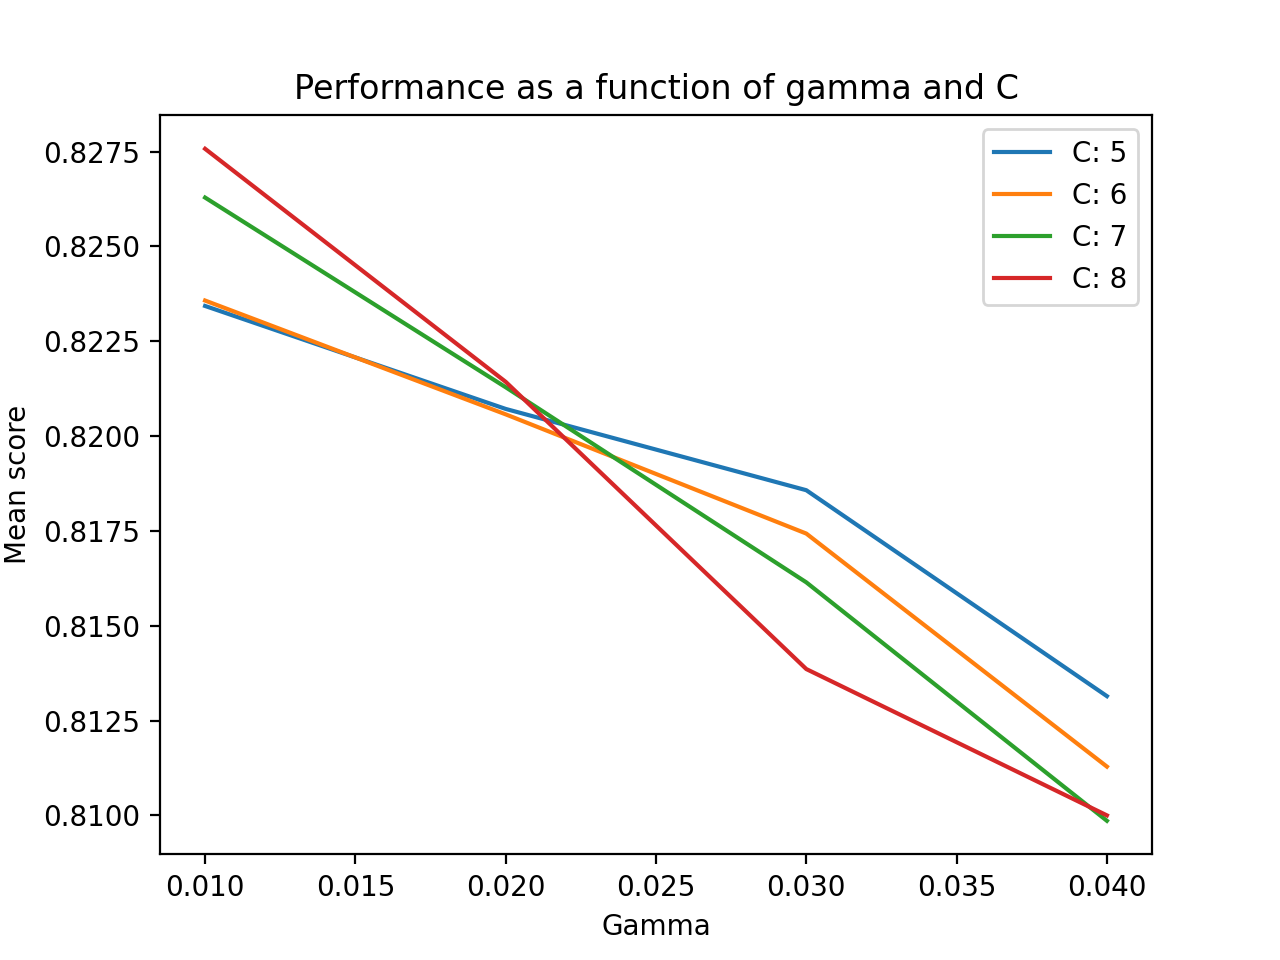

[CV] END ....................................C=5, gamma=0.01; total time=   4.8s
[CV] END ....................................C=5, gamma=0.01; total time=   3.6s
[CV] END ....................................C=5, gamma=0.02; total time=   3.6s
[CV] END ....................................C=5, gamma=0.03; total time=   5.5s
[CV] END ....................................C=5, gamma=0.04; total time=   4.4s
[CV] END ....................................C=6, gamma=0.01; total time=   4.6s
[CV] END ....................................C=6, gamma=0.01; total time=   4.3s
[CV] END ....................................C=6, gamma=0.02; total time=   4.3s
[CV] END ....................................C=6, gamma=0.03; total time=   4.5s
[CV] END ....................................C=6, gamma=0.04; total time=   8.8s
[CV] END ....................................C=7, gamma=0.01; total time=   5.0s
[CV] END ....................................C=7, gamma=0.01; total time=   3.5s
[CV] END ...................

In [17]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [5, 6, 7, 8],  # Regularization parameter
    'gamma': [0.01, 0.02, 0.03, 0.04],  # This is equivalent to the inverse of sigma for the RBF kernel
}

# Create a base model
svc = SVC(kernel="rbf")

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Plot the results
mean_scores = grid_search.cv_results_['mean_test_score']
scores = np.array(mean_scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

for i, value in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], scores[i], label='C: ' + str(value))

plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.title('Performance as a function of gamma and C')
plt.show()


## Scale Data & Tune the Model

Scaling data for an SVM ensures that all features contribute equally to the decision boundary. Without scaling, features with larger magnitudes could dominate the model, potentially leading to suboptimal decision boundaries. Properly scaled data helps the SVM algorithm converge faster and find a more accurate separating hyperplane.  We then tune our models to find the best kernel and the best parameters to optimize our model.

In [18]:
# scale the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop(columns='class'))
test_scaled = scaler.transform(test.drop(columns='class'))

# Hyperparameter tuning 
# tune for C (regularization) & type of kernel.
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(train_scaled, train['class'])

# Check the best parameters found 
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.964 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.976 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.972 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.822 total time=   2.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.823 total time=   2.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.823 total time=   2.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.830 total time=   2.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.821 total time=   2.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.973 total time=   1.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [19]:
# print the best parameters & the accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score (accuracy): {:.4f}".format(grid_search.best_score_))


Best parameters found:  {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best cross-validated score (accuracy): 0.9911


## Evaluating Model Performance

Below we evaluate our model on the test data.

In [20]:
# Predicting on the test data using the best model found by GridSearchCV
evaluate_kernel_test = grid_search.predict(test_scaled)

# Generating the confusion matrix
cm = confusion_matrix(test['class'], evaluate_kernel_test)
print("Confusion Matrix:")
print(cm)

# Printing a more detailed classification report
report = classification_report(test['class'], evaluate_kernel_test)
print("\nClassification Report:")
print(report)

# Printing the best score obtained during cross-validation
print("\nBest cross-validation score:", grid_search.best_score_)

# Calculating and printing the accuracy on the test set
test_accuracy = (evaluate_kernel_test == test['class']).mean()
print(f"\nTest set accuracy: {test_accuracy:.4f}")


Confusion Matrix:
[[1479    7   13]
 [  11  243    1]
 [   0    0 1246]]

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1499
         QSO       0.97      0.95      0.96       255
        STAR       0.99      1.00      0.99      1246

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Best cross-validation score: 0.9911428571428571

Test set accuracy: 0.9893
